<a href="https://colab.research.google.com/github/edySR/ICOMATH_2024/blob/main/ICOMATH_penelitian_2024_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout, GRU

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data-data/penelitian/3909_all_compounds_new_lagi.csv")

In [ ]:
df

,572,1374,1805,2008,2019,2082,2142,2271,2353,2540,...,162679317,163027008,163061838,163106457,163196262,163196278,163196389,163196955,163322401,class
0,0.052632,0.083333,0.136364,0.064935,0.036145,0.217391,0.048780,0.300000,0.095238,0.115385,...,0.155844,0.028169,0.107527,0.072917,0.075000,0.177778,0.222222,0.155844,0.153846,0
1,0.071429,0.058824,0.093750,0.260274,0.263158,0.266667,0.039216,0.291667,0.253968,0.145455,...,0.192771,0.276923,0.177083,0.177083,0.200000,0.340426,0.151515,0.222222,0.186441,0
2,0.043478,0.038462,0.081633,0.358025,0.520000,0.244444,0.028986,0.311475,0.447761,0.345794,...,0.409639,0.422535,0.235849,0.271845,0.443038,0.396552,0.270270,0.426829,0.189189,0
3,0.035714,0.032258,0.050000,0.445783,0.653333,0.200000,0.051948,0.285714,0.528571,0.375000,...,0.494118,0.541667,0.293578,0.342857,0.569620,0.358209,0.268293,0.443182,0.195122,0
4,0.035714,0.032258,0.067797,0.379310,0.476190,0.269231,0.025316,0.384615,0.550725,0.439252,...,0.530120,0.370370,0.305556,0.317757,0.530864,0.444444,0.405405,0.548780,0.240506,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,0.044643,0.025000,0.016667,0.455285,0.550847,0.136364,0.111111,0.273504,0.418803,0.510638,...,0.441860,0.393443,0.587302,0.612903,0.525000,0.351351,0.304000,0.453125,0.308333,1
3905,0.088889,0.122449,0.080000,0.247191,0.223404,0.075472,0.241379,0.173913,0.088889,0.141732,...,0.072727,0.159091,0.375000,0.375000,0.127451,0.171429,0.158537,0.102804,0.369231,1
3906,0.066667,0.461538,0.370370,0.205128,0.101124,0.025641,0.718750,0.122807,0.038462,0.032258,...,0.010000,0.250000,0.210526,0.210526,0.053763,0.015625,0.054054,0.041237,0.180328,1
3907,0.078431,0.129630,0.090909,0.258065,0.247423,0.105263,0.278689,0.129870,0.083333,0.135338,...,0.042017,0.213483,0.408163,0.408163,0.130841,0.157895,0.147727,0.097345,0.357143,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Columns: 1602 entries, 572 to class
dtypes: float64(1601), int64(1)
memory usage: 47.8 MB


In [ ]:
df.shape

(3909, 1602)

Text(0.5, 1.0, 'Class Distributions \n (1: non antibiotic || 0: Antibiotic)')

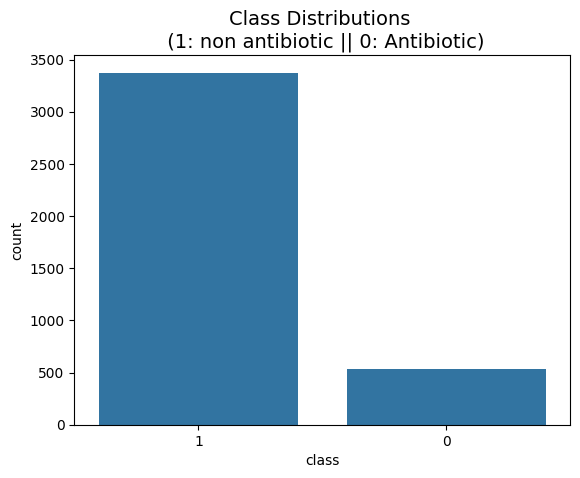

In [ ]:
value_counts = df['class'].value_counts()
sns.countplot(x='class', data=df, order=value_counts.index)
plt.title('Class Distributions \n (1: non antibiotic || 0: Antibiotic)', fontsize=14)

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
# Membagi data menjadi data pelatihan (80%) dan sisa (30%)
#X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membagi sisa data menjadi data validasi (75%) dan data uji (25% dari sisa)
# Karena sisa data adalah 20%, maka data validasi adalah 15% dan data uji adalah 5%
#X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.25, random_state=42)

In [ ]:
hitung=y_train.value_counts()
hitung


class
1    2720
0     407
Name: count, dtype: int64

In [ ]:
EPOCHS = 200
BATCH_SIZE = 128

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
#atur learning rate
learning_rate=0.005
optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(100, activation='relu'))




model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[early_stopping])



Epoch 1/200
25/25 [==============================] - 1s 20ms/step - loss: 0.4003 - accuracy: 0.8654 - val_loss: 0.3393 - val_accuracy: 0.8402
Epoch 2/200
25/25 [==============================] - 0s 9ms/step - loss: 0.2661 - accuracy: 0.8890 - val_loss: 0.2759 - val_accuracy: 0.8951
Epoch 3/200
25/25 [==============================] - 0s 11ms/step - loss: 0.2334 - accuracy: 0.9018 - val_loss: 0.2340 - val_accuracy: 0.9207
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.2194 - accuracy: 0.9140 - val_loss: 0.2317 - val_accuracy: 0.9233
Epoch 5/200
25/25 [==============================] - 0s 10ms/step - loss: 0.1872 - accuracy: 0.9354 - val_loss: 0.2071 - val_accuracy: 0.9361
Epoch 6/200
25/25 [==============================] - 0s 9ms/step - loss: 0.1815 - accuracy: 0.9373 - val_loss: 0.2050 - val_accuracy: 0.9373
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 0.1815 - accuracy: 0.9335 - val_loss: 0.1953 - val_accuracy: 0.9450
Epoch 8/20

In [ ]:
X_train.shape[1]

1601

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               160200    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 170401 (665.63 KB)
Trainable params: 170401 (665.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


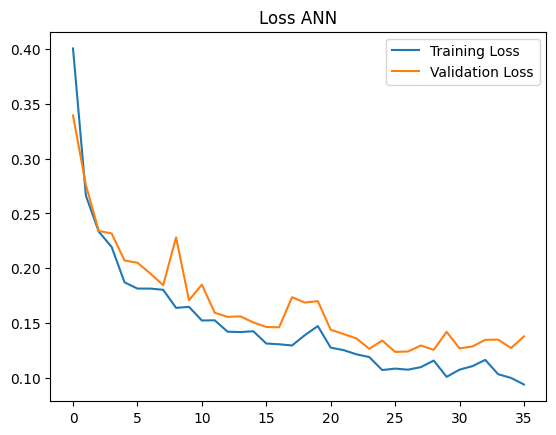

In [ ]:
#plot loss and acuracy
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss ANN')
plt.legend()
plt.show()

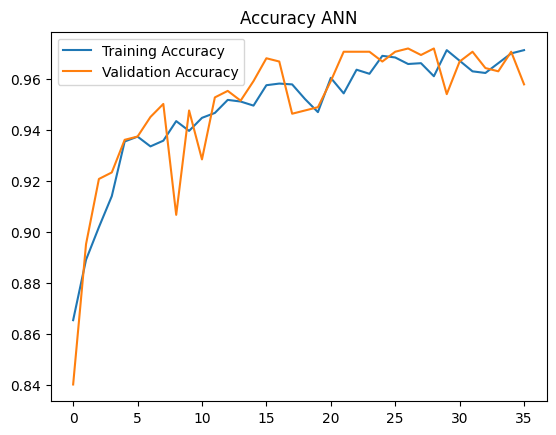

In [ ]:
#plot loss and acuracy
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy ANN')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, f1_score, classification_report
y_pred=np.round(model.predict(X_test))
cm = confusion_matrix(y_test,y_pred)
cm_norm= confusion_matrix(y_test,y_pred, normalize='all')
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,  average='micro')
recall=recall_score(y_test,y_pred, average='micro')
f1=f1_score(y_test,y_pred, average='micro')
#print
print("Accuracy : ",accuracy)
print("Precision: ",precision)
print("Recall   : ",recall)
print("F1-Score : ",f1)


25/25 [==============================] - 0s 3ms/step
Accuracy :  0.9705882352941176
Precision:  0.9705882352941176
Recall   :  0.9705882352941176
F1-Score :  0.9705882352941176


In [ ]:
y_test

2793    1
2803    1
2218    1
3111    1
3161    1
       ..
1360    1
3759    1
2764    1
2389    1
807     1
Name: class, Length: 782, dtype: int64

In [ ]:
print("Evaluation on Validation Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
report=classification_report(y_test, y_pred, output_dict=True)
for key, value in report.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")

Evaluation on Validation Data:
Accuracy: 0.9705882352941176
Classification Report:
0
  precision: 0.97297
  recall: 0.84375
  f1-score: 0.90377
  support: 128.00000
1
  precision: 0.97019
  recall: 0.99541
  f1-score: 0.98264
  support: 654.00000
accuracy: 0.9705882352941176
macro avg
  precision: 0.97158
  recall: 0.91958
  f1-score: 0.94320
  support: 782.00000
weighted avg
  precision: 0.97065
  recall: 0.97059
  f1-score: 0.96973
  support: 782.00000


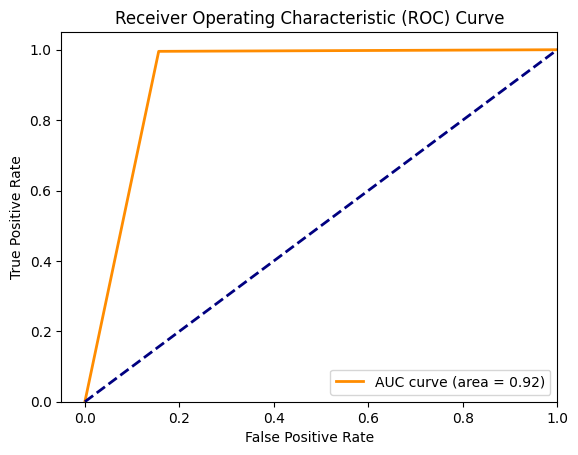

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, _ = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2, label ='AUC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_data = y_pred.reshape(-1)

# Membuat DataFrame untuk y_test dan y_pred
perbandingan = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_data})

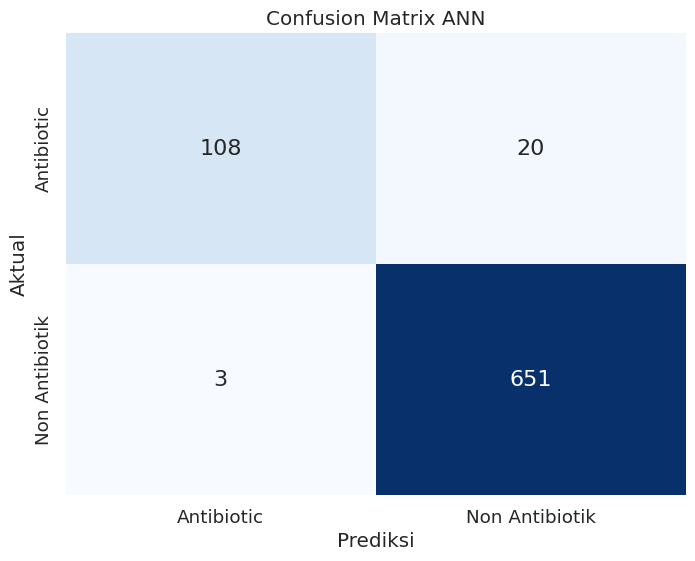

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Antibiotic', 'Non Antibiotik'], yticklabels=['Antibiotic', 'Non Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix ANN')
plt.show()

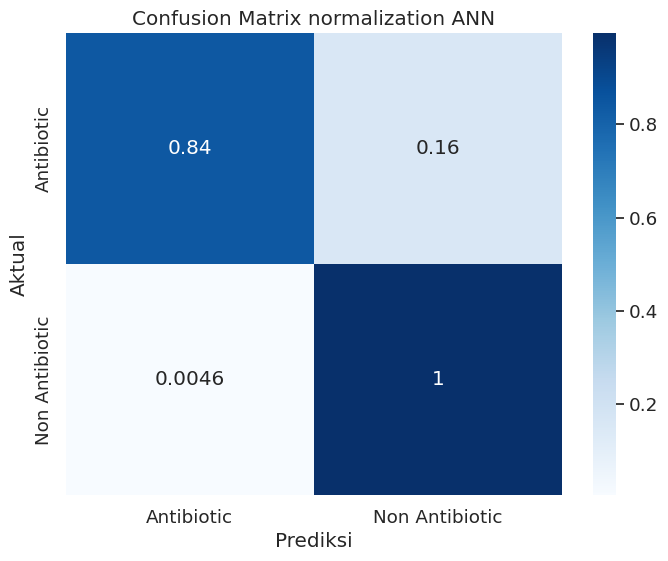

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))

sns.heatmap(cm_normalized, annot=True, cmap="Blues", xticklabels=["Antibiotic", "Non Antibiotic"], yticklabels=["Antibiotic", "Non Antibiotic"])

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix normalization ANN')
plt.show()

In [ ]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_valid.to_csv('X_valid.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_valid.to_csv('y_valid.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

KeyboardInterrupt: 

# **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
#transform data training
X_s, y_s = smote.fit_resample(X,y)

In [ ]:
value_counts_s = y_s.value_counts()
value_counts_s

class
0    3374
1    3374
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Pertama, kita bagi data menjadi data pelatihan (80%) dan sisa (20%)
#X_train_s, X_remaining_s, y_train_s, y_remaining_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# Selanjutnya, bagi sisa data menjadi data validasi (50%) dan data uji (50% dari sisa)
#X_valid_s, X_test_s, y_valid_s, y_test_s = train_test_split(X_remaining_s, y_remaining_s, test_size=0.25, random_state=42)

In [ ]:
#cek y_test
nilai_y_test_s = y_test_s.value_counts()
nilai_y_test_s

class
0    682
1    668
Name: count, dtype: int64

In [ ]:
#atur learning rate
learning_rate=0.005
optimizer = Adam(learning_rate=learning_rate)

model3 = Sequential()
model3.add(Dense(100, input_dim=X_train_s.shape[1], activation='relu'))
model3.add(Dense(100, activation='relu'))

#model3.add(Dense(64, activation='relu', kernel_initializer='he_normal'))

#model3.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#model3.add(Dense(8, activation='relu', kernel_initializer='he_normal'))

model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_s = model3.fit(X_train_s, y_train_s,validation_data=(X_test_s, y_test_s), epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[early_stopping])



Epoch 1/200
43/43 [==============================] - 1s 14ms/step - loss: 0.4565 - accuracy: 0.7946 - val_loss: 0.3619 - val_accuracy: 0.8474
Epoch 2/200
43/43 [==============================] - 0s 8ms/step - loss: 0.3270 - accuracy: 0.8688 - val_loss: 0.2921 - val_accuracy: 0.8778
Epoch 3/200
43/43 [==============================] - 0s 9ms/step - loss: 0.2890 - accuracy: 0.8831 - val_loss: 0.2647 - val_accuracy: 0.8941
Epoch 4/200
43/43 [==============================] - 0s 8ms/step - loss: 0.2556 - accuracy: 0.8920 - val_loss: 0.2354 - val_accuracy: 0.9089
Epoch 5/200
43/43 [==============================] - 0s 8ms/step - loss: 0.2381 - accuracy: 0.9005 - val_loss: 0.2100 - val_accuracy: 0.9200
Epoch 6/200
43/43 [==============================] - 0s 8ms/step - loss: 0.2221 - accuracy: 0.9096 - val_loss: 0.1954 - val_accuracy: 0.9230
Epoch 7/200
43/43 [==============================] - 0s 9ms/step - loss: 0.1994 - accuracy: 0.9194 - val_loss: 0.1996 - val_accuracy: 0.9319
Epoch 8/200


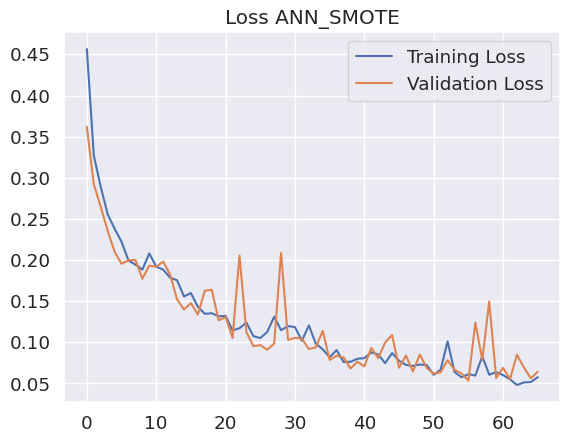

In [ ]:
#plot loss and acuracy
plt.plot(history_s.history['loss'],label='Training Loss')
plt.plot(history_s.history['val_loss'],label='Validation Loss')
plt.title('Loss ANN_SMOTE')
plt.legend()
plt.show()

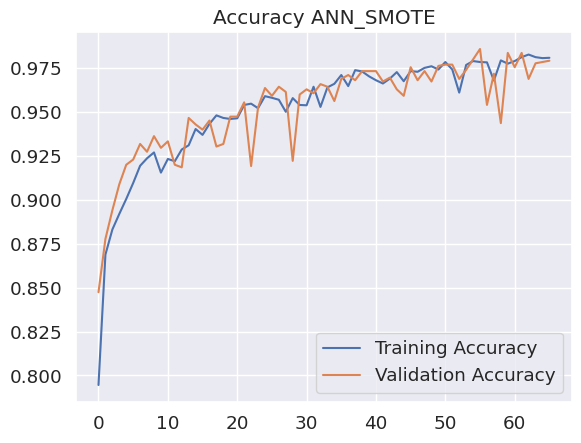

In [ ]:
#plot loss and acuracy
plt.title('Accuracy ANN_SMOTE')
plt.plot(history_s.history['accuracy'],label='Training Accuracy')
plt.plot(history_s.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, f1_score
y_pred_s=np.round(model3.predict(X_test_s))
cm_s = confusion_matrix(y_test_s,y_pred_s)
accuracy_s=accuracy_score(y_test_s,y_pred_s)
precision_s=precision_score(y_test_s,y_pred_s)
recall_s=recall_score(y_test_s,y_pred_s)
f1_s=f1_score(y_test_s,y_pred_s)
#print
print("Accuracy : ",accuracy_s)
print("Precision: ",precision_s)
print("Recall   : ",recall_s)
print("F1-Score : ",f1_s)


43/43 [==============================] - 0s 4ms/step
Accuracy :  0.9859259259259259
Precision:  0.9865067466266867
Recall   :  0.9850299401197605
F1-Score :  0.9857677902621723


In [ ]:
print("Evaluation on Validation Data:")
print(f"Accuracy: {accuracy_score(y_test_s, y_pred_s)}")
print("Classification Report:")
report3=classification_report(y_test_s, y_pred_s, output_dict=True)
for key, value in report3.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")

Evaluation on Validation Data:
Accuracy: 0.9859259259259259
Classification Report:
0
  precision: 0.98536
  recall: 0.98680
  f1-score: 0.98608
  support: 682.00000
1
  precision: 0.98651
  recall: 0.98503
  f1-score: 0.98577
  support: 668.00000
accuracy: 0.9859259259259259
macro avg
  precision: 0.98593
  recall: 0.98592
  f1-score: 0.98592
  support: 1350.00000
weighted avg
  precision: 0.98593
  recall: 0.98593
  f1-score: 0.98593
  support: 1350.00000


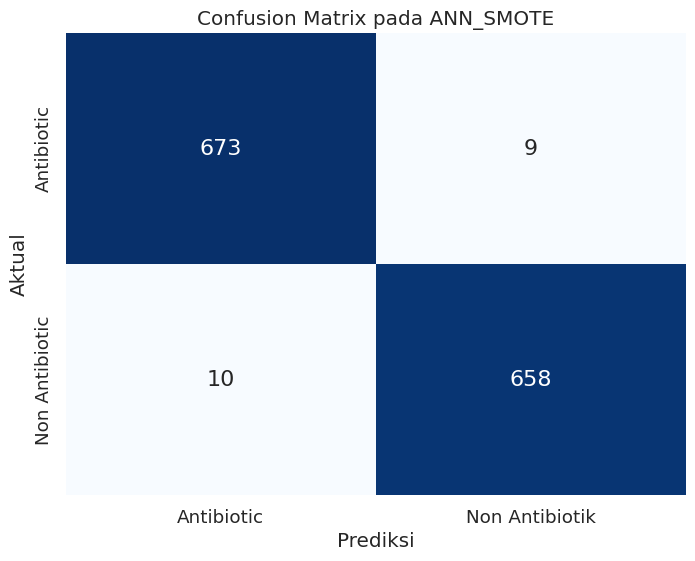

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
sns.heatmap(cm_s, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Antibiotic', 'Non Antibiotik'], yticklabels=['Antibiotic', 'Non Antibiotic'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix pada ANN_SMOTE')
plt.show()

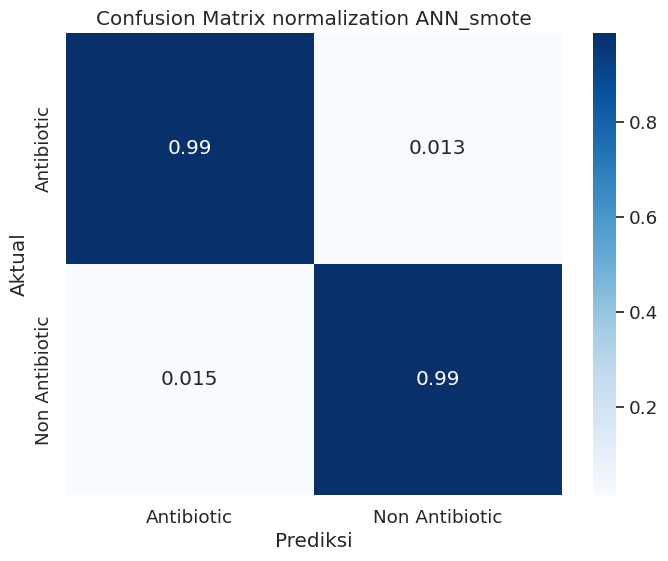

In [ ]:
cm_normalized_s = cm_s.astype('float') / cm_s.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))

sns.heatmap(cm_normalized_s, annot=True, cmap="Blues", xticklabels=["Antibiotic", "Non Antibiotic"], yticklabels=["Antibiotic", "Non Antibiotic"])

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix normalization ANN_smote')
plt.show()

# **Undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
#transform data training
X_under, y_under = rus.fit_resample(X,y)

In [ ]:
value_counts_under = y_under.value_counts()
value_counts_under

class
0    535
1    535
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Pertama, kita bagi data menjadi data pelatihan (80%) dan sisa (20%)
#X_train_under, X_remaining_under, y_train_under, y_remaining_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

# Selanjutnya, bagi sisa data menjadi data validasi (50%) dan data uji (50% dari sisa)
#X_valid_under, X_test_under, y_valid_under, y_test_under = train_test_split(X_remaining_under, y_remaining_under, test_size=0.25, random_state=42)

In [ ]:
#cek y_test
nilai_y_test_under = y_test_under.value_counts()
nilai_y_test_under

class
0    116
1     98
Name: count, dtype: int64

In [ ]:
#atur learning rate
learning_rate=0.005
optimizer = Adam(learning_rate=learning_rate)

model2 = Sequential()
model2.add(Dense(100, input_dim=X_train_under.shape[1], activation='relu'))
model2.add(Dense(100, activation='relu'))

#model2.add(Dense(64, activation='relu', kernel_initializer='he_normal'))

#model2.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#model2.add(Dense(8, activation='relu', kernel_initializer='he_normal'))

model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_under = model2.fit(X_train_under, y_train_under,validation_data=(X_test_under, y_test_under), epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[early_stopping])



Epoch 1/200
7/7 [==============================] - 2s 70ms/step - loss: 0.6172 - accuracy: 0.6752 - val_loss: 0.5619 - val_accuracy: 0.7523
Epoch 2/200
7/7 [==============================] - 0s 21ms/step - loss: 0.4752 - accuracy: 0.8107 - val_loss: 0.5377 - val_accuracy: 0.7664
Epoch 3/200
7/7 [==============================] - 0s 18ms/step - loss: 0.4177 - accuracy: 0.8201 - val_loss: 0.4684 - val_accuracy: 0.7991
Epoch 4/200
7/7 [==============================] - 0s 21ms/step - loss: 0.3792 - accuracy: 0.8446 - val_loss: 0.4421 - val_accuracy: 0.8084
Epoch 5/200
7/7 [==============================] - 0s 20ms/step - loss: 0.3496 - accuracy: 0.8563 - val_loss: 0.4166 - val_accuracy: 0.8271
Epoch 6/200
7/7 [==============================] - 0s 18ms/step - loss: 0.3273 - accuracy: 0.8797 - val_loss: 0.4519 - val_accuracy: 0.8084
Epoch 7/200
7/7 [==============================] - 0s 20ms/step - loss: 0.3270 - accuracy: 0.8715 - val_loss: 0.4614 - val_accuracy: 0.8178
Epoch 8/200
7/7 [===

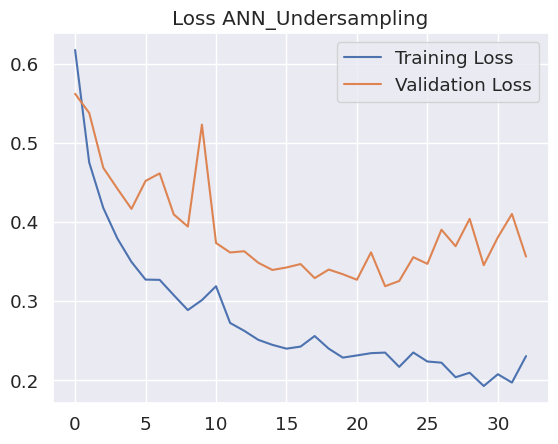

In [ ]:
#plot loss and acuracy
plt.title('Loss ANN_Undersampling')
plt.plot(history_under.history['loss'],label='Training Loss')
plt.plot(history_under.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

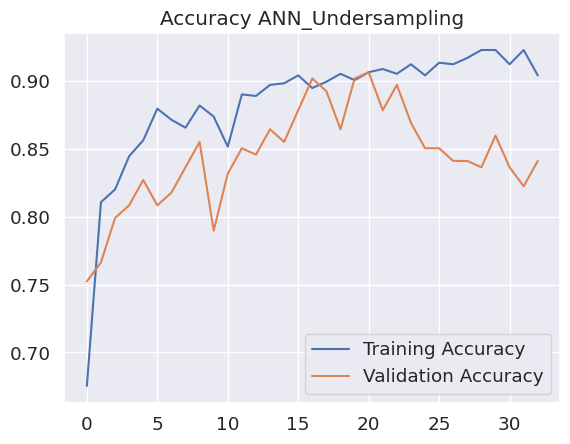

In [ ]:
#plot loss and acuracy
plt.title('Accuracy ANN_Undersampling')
plt.plot(history_under.history['accuracy'],label='Training Accuracy')
plt.plot(history_under.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, f1_score
y_pred_under=np.round(model2.predict(X_test_under))
cm_under = confusion_matrix(y_test_under,y_pred_under)
accuracy_under=accuracy_score(y_test_under,y_pred_under)
precision_under=precision_score(y_test_under,y_pred_under)
recall_under=recall_score(y_test_under,y_pred_under)
f1_under=f1_score(y_test_under,y_pred_under)
#print
print("Accuracy : ",accuracy_under)
print("Precision: ",precision_under)
print("Recall   : ",recall_under)
print("F1-Score : ",f1_under)


7/7 [==============================] - 0s 4ms/step
Accuracy :  0.897196261682243
Precision:  0.88
Recall   :  0.8979591836734694
F1-Score :  0.888888888888889


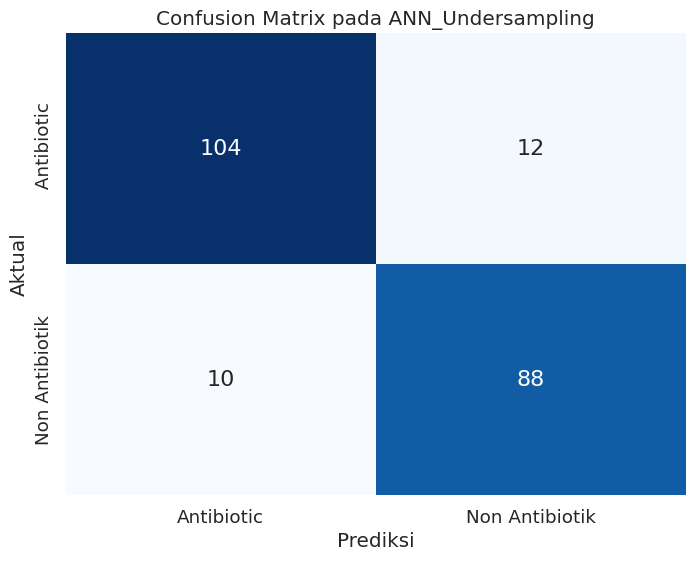

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
sns.heatmap(cm_under, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Antibiotic', 'Non Antibiotik'], yticklabels=[' Antibiotic', 'Non Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix pada ANN_Undersampling')
plt.show()

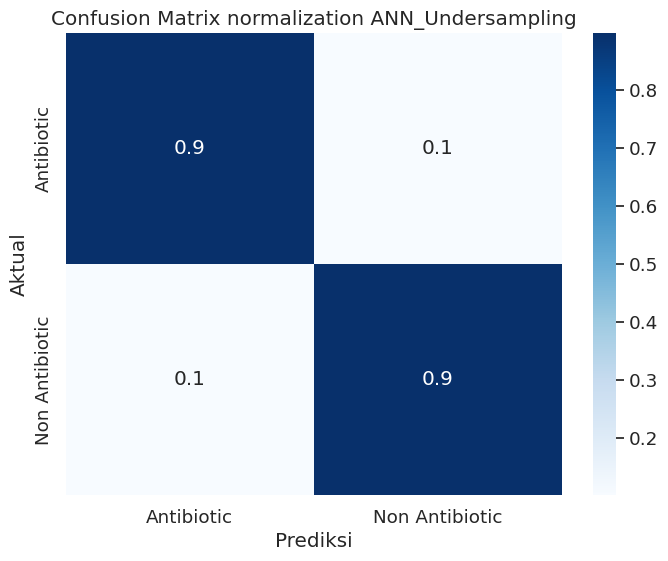

In [ ]:
cm_normalized_under = cm_under.astype('float') / cm_under.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))

sns.heatmap(cm_normalized_under, annot=True, cmap="Blues", xticklabels=["Antibiotic", "Non Antibiotic"], yticklabels=["Antibiotic", "Non Antibiotic"])

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix normalization ANN_Undersampling')
plt.show()

In [ ]:
print("Evaluation on Validation Data:")
print(f"Accuracy: {accuracy_score(y_test_under, y_pred_under)}")
print("Classification Report:")
report2=classification_report(y_test_under, y_pred_under,output_dict=True)
for key, value in report2.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")

Evaluation on Validation Data:
Accuracy: 0.897196261682243
Classification Report:
0
  precision: 0.91228
  recall: 0.89655
  f1-score: 0.90435
  support: 116.00000
1
  precision: 0.88000
  recall: 0.89796
  f1-score: 0.88889
  support: 98.00000
accuracy: 0.897196261682243
macro avg
  precision: 0.89614
  recall: 0.89726
  f1-score: 0.89662
  support: 214.00000
weighted avg
  precision: 0.89750
  recall: 0.89720
  f1-score: 0.89727
  support: 214.00000


# **SVM SMOTE**

In [ ]:
import imblearn
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state=42)
#transform data training
X_svms, y_svms = svmsmote.fit_resample(X, y)

In [ ]:
value_counts_svms = y_svms.value_counts()
value_counts_svms

class
0    3374
1    3374
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Pertama, kita bagi data menjadi data pelatihan (80%) dan sisa (20%)
#X_train_s, X_remaining_s, y_train_s, y_remaining_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)
X_train_svms, X_test_svms, y_train_svms, y_test_svms = train_test_split(X_svms, y_svms, test_size=0.2, random_state=42)

# Selanjutnya, bagi sisa data menjadi data validasi (50%) dan data uji (50% dari sisa)
#X_valid_s, X_test_s, y_valid_s, y_test_s = train_test_split(X_remaining_s, y_remaining_s, test_size=0.25, random_state=42)

In [ ]:
#cek y_test
nilai_y_test_svms = y_test_svms.value_counts()
nilai_y_test_svms

class
0    682
1    668
Name: count, dtype: int64

In [ ]:
#atur learning rate
learning_rate=0.005
optimizer = Adam(learning_rate=learning_rate)

model10 = Sequential()
model10.add(Dense(100, input_dim=X_train_s.shape[1], activation='relu'))
model10.add(Dense(100, activation='relu'))

#model3.add(Dense(64, activation='relu', kernel_initializer='he_normal'))

#model3.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#model3.add(Dense(8, activation='relu', kernel_initializer='he_normal'))

model10.add(Dense(1, activation='sigmoid'))
model10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_svms = model10.fit(X_train_svms, y_train_svms,validation_data=(X_test_svms, y_test_svms), epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[early_stopping])



Epoch 1/200
43/43 [==============================] - 1s 15ms/step - loss: 0.4818 - accuracy: 0.7770 - val_loss: 0.4031 - val_accuracy: 0.8237
Epoch 2/200
43/43 [==============================] - 0s 8ms/step - loss: 0.3682 - accuracy: 0.8518 - val_loss: 0.4275 - val_accuracy: 0.8348
Epoch 3/200
43/43 [==============================] - 0s 10ms/step - loss: 0.3363 - accuracy: 0.8638 - val_loss: 0.4218 - val_accuracy: 0.8022
Epoch 4/200
43/43 [==============================] - 1s 13ms/step - loss: 0.3053 - accuracy: 0.8811 - val_loss: 0.3166 - val_accuracy: 0.8748
Epoch 5/200
43/43 [==============================] - 1s 13ms/step - loss: 0.2796 - accuracy: 0.8896 - val_loss: 0.2627 - val_accuracy: 0.8956
Epoch 6/200
43/43 [==============================] - 1s 13ms/step - loss: 0.2502 - accuracy: 0.8998 - val_loss: 0.2297 - val_accuracy: 0.9074
Epoch 7/200
43/43 [==============================] - 1s 13ms/step - loss: 0.2218 - accuracy: 0.9163 - val_loss: 0.2303 - val_accuracy: 0.9148
Epoch 8

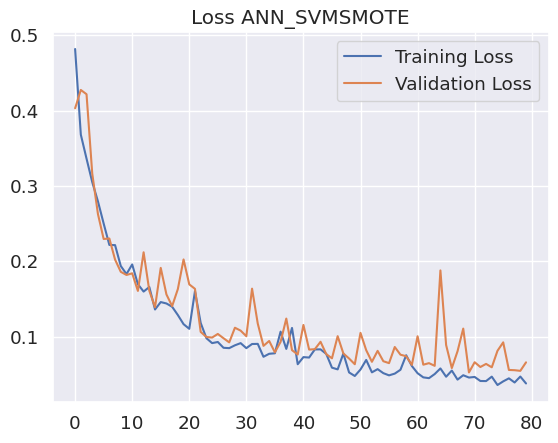

In [ ]:
#plot loss and acuracy
plt.plot(history_svms.history['loss'],label='Training Loss')
plt.plot(history_svms.history['val_loss'],label='Validation Loss')
plt.title('Loss ANN_SVMSMOTE')
plt.legend()
plt.show()

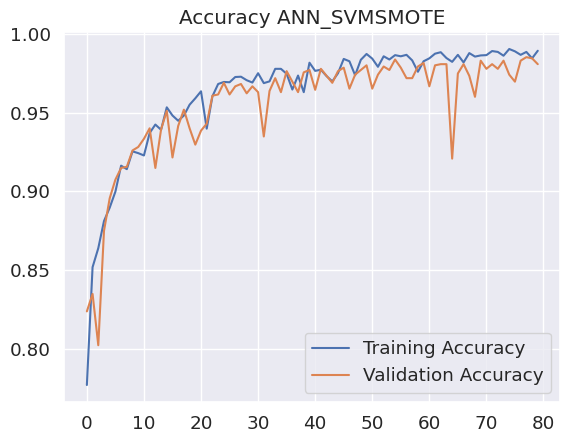

In [ ]:
#plot loss and acuracy
plt.title('Accuracy ANN_SVMSMOTE')
plt.plot(history_svms.history['accuracy'],label='Training Accuracy')
plt.plot(history_svms.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, f1_score
y_pred_svms=np.round(model10.predict(X_test_svms))
cm_svms = confusion_matrix(y_test_svms,y_pred_svms)
accuracy_svms=accuracy_score(y_test_svms,y_pred_svms)
precision_svms=precision_score(y_test_svms,y_pred_svms)
recall_svms=recall_score(y_test_svms,y_pred_svms)
f1_svms=f1_score(y_test_svms,y_pred_svms)
#print
print("Accuracy : ",accuracy_svms)
print("Precision: ",precision_svms)
print("Recall   : ",recall_svms)
print("F1-Score : ",f1_svms)


43/43 [==============================] - 0s 2ms/step
Accuracy :  0.9829629629629629
Precision:  0.9878971255673222
Recall   :  0.9775449101796407
F1-Score :  0.9826937547027841


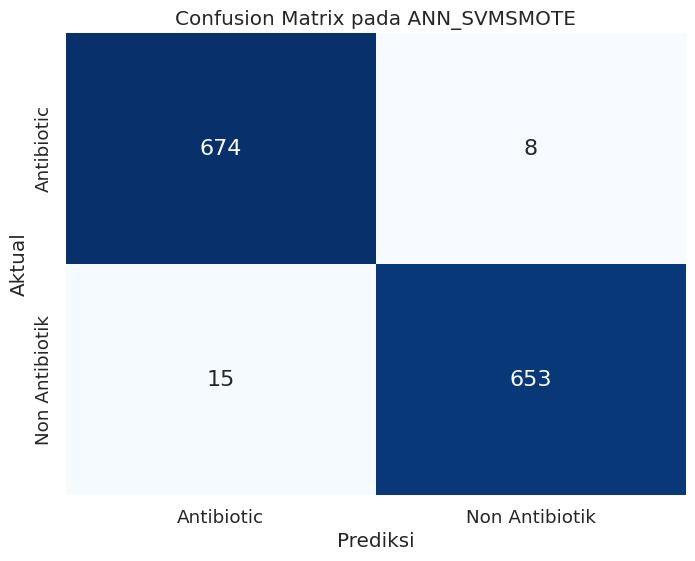

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
sns.heatmap(cm_svms, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Antibiotic', 'Non Antibiotik'], yticklabels=['Antibiotic', 'Non Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix pada ANN_SVMSMOTE')
plt.show()

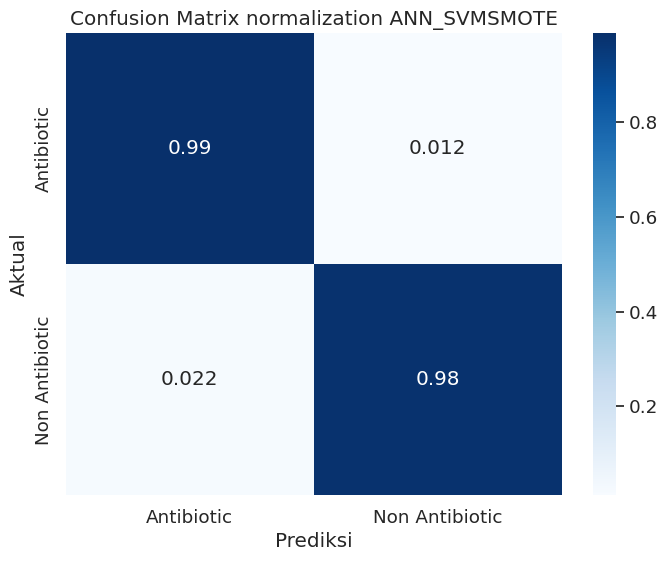

In [ ]:
cm_normalized_svms = cm_svms.astype('float') / cm_svms.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))

sns.heatmap(cm_normalized_svms, annot=True, cmap="Blues", xticklabels=["Antibiotic", "Non Antibiotic"], yticklabels=["Antibiotic", "Non Antibiotic"])

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix normalization ANN_SVMSMOTE')
plt.show()

In [ ]:
print("Evaluation on Validation Data:")
print(f"Accuracy: {accuracy_score(y_test_svms, y_pred_svms)}")
print("Classification Report:")
report10=classification_report(y_test_svms, y_pred_svms,output_dict=True)
for key, value in report10.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")

Evaluation on Validation Data:
Accuracy: 0.9829629629629629
Classification Report:
0
  precision: 0.97823
  recall: 0.98827
  f1-score: 0.98322
  support: 682.00000
1
  precision: 0.98790
  recall: 0.97754
  f1-score: 0.98269
  support: 668.00000
accuracy: 0.9829629629629629
macro avg
  precision: 0.98306
  recall: 0.98291
  f1-score: 0.98296
  support: 1350.00000
weighted avg
  precision: 0.98301
  recall: 0.98296
  f1-score: 0.98296
  support: 1350.00000


# **Borderline SVM**

In [ ]:
import imblearn
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=42)
#transform data training
X_bs, y_bs = bsmote.fit_resample(X, y)

In [ ]:
value_counts_bs = y_bs.value_counts()
value_counts_bs

class
0    3374
1    3374
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Pertama, kita bagi data menjadi data pelatihan (80%) dan sisa (20%)
#X_train_s, X_remaining_s, y_train_s, y_remaining_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X_bs, y_bs, test_size=0.2, random_state=42)

# Selanjutnya, bagi sisa data menjadi data validasi (50%) dan data uji (50% dari sisa)
#X_valid_s, X_test_s, y_valid_s, y_test_s = train_test_split(X_remaining_s, y_remaining_s, test_size=0.25, random_state=42)

In [ ]:
#cek y_test
nilai_y_test_bs = y_test_bs.value_counts()
nilai_y_test_bs

class
0    682
1    668
Name: count, dtype: int64

In [ ]:
#atur learning rate
learning_rate=0.005
optimizer = Adam(learning_rate=learning_rate)

model11 = Sequential()
model11.add(Dense(100, input_dim=X_train_s.shape[1], activation='relu'))
model11.add(Dense(100, activation='relu'))

#model3.add(Dense(64, activation='relu', kernel_initializer='he_normal'))

#model3.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#model3.add(Dense(8, activation='relu', kernel_initializer='he_normal'))

model11.add(Dense(1, activation='sigmoid'))
model11.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bs = model11.fit(X_train_bs, y_train_bs,validation_data=(X_test_bs, y_test_bs), epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[early_stopping])



Epoch 1/200
43/43 [==============================] - 1s 13ms/step - loss: 0.5071 - accuracy: 0.7573 - val_loss: 0.4359 - val_accuracy: 0.8170
Epoch 2/200
43/43 [==============================] - 0s 11ms/step - loss: 0.4208 - accuracy: 0.8203 - val_loss: 0.4176 - val_accuracy: 0.8207
Epoch 3/200
43/43 [==============================] - 1s 12ms/step - loss: 0.3961 - accuracy: 0.8298 - val_loss: 0.3496 - val_accuracy: 0.8452
Epoch 4/200
43/43 [==============================] - 1s 13ms/step - loss: 0.3514 - accuracy: 0.8540 - val_loss: 0.3419 - val_accuracy: 0.8578
Epoch 5/200
43/43 [==============================] - 1s 13ms/step - loss: 0.3180 - accuracy: 0.8668 - val_loss: 0.2721 - val_accuracy: 0.8919
Epoch 6/200
43/43 [==============================] - 1s 12ms/step - loss: 0.2785 - accuracy: 0.8866 - val_loss: 0.2379 - val_accuracy: 0.9104
Epoch 7/200
43/43 [==============================] - 1s 14ms/step - loss: 0.2629 - accuracy: 0.8961 - val_loss: 0.2669 - val_accuracy: 0.8911
Epoch 

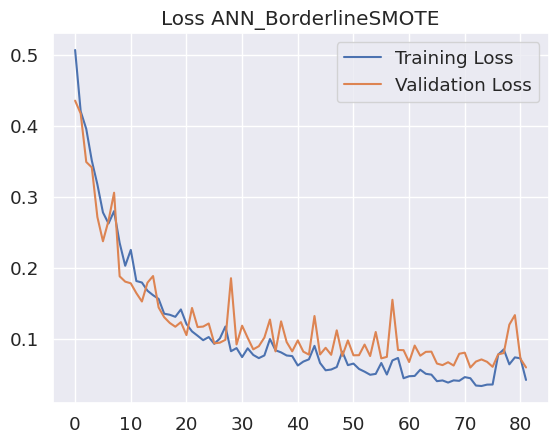

In [ ]:
#plot loss and acuracy
plt.plot(history_bs.history['loss'],label='Training Loss')
plt.plot(history_bs.history['val_loss'],label='Validation Loss')
plt.title('Loss ANN_BorderlineSMOTE')
plt.legend()
plt.show()

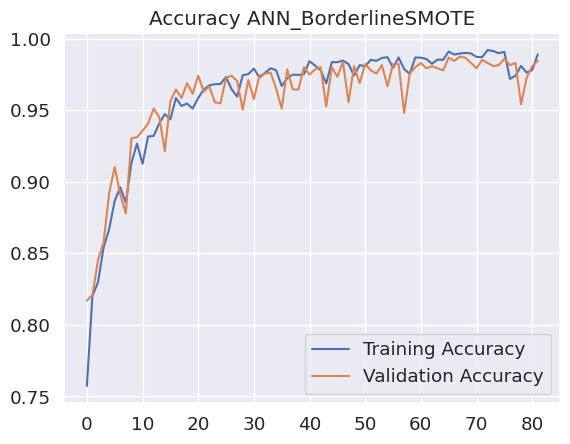

In [ ]:
#plot loss and acuracy
plt.title('Accuracy ANN_BorderlineSMOTE')
plt.plot(history_bs.history['accuracy'],label='Training Accuracy')
plt.plot(history_bs.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, f1_score
y_pred_bs=np.round(model11.predict(X_test_bs))
cm_bs = confusion_matrix(y_test_bs,y_pred_bs)
accuracy_bs=accuracy_score(y_test_bs,y_pred_bs)
precision_bs=precision_score(y_test_bs,y_pred_bs)
recall_bs=recall_score(y_test_bs,y_pred_bs)
f1_bs=f1_score(y_test_bs,y_pred_bs)
#print
print("Accuracy : ",accuracy_bs)
print("Precision: ",precision_bs)
print("Recall   : ",recall_bs)
print("F1-Score : ",f1_bs)


43/43 [==============================] - 0s 2ms/step
Accuracy :  0.9851851851851852
Precision:  0.9879518072289156
Recall   :  0.9820359281437125
F1-Score :  0.984984984984985


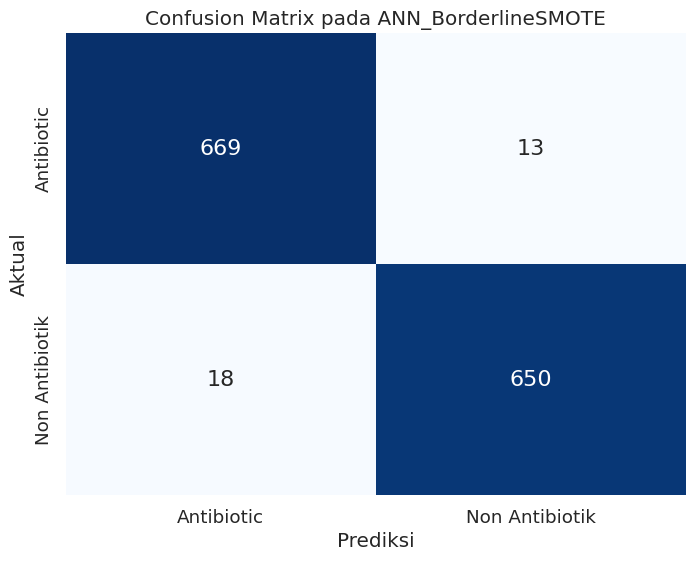

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
sns.heatmap(cm_bs, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Antibiotic', 'Non Antibiotik'], yticklabels=['Antibiotic', 'Non Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix pada ANN_BorderlineSMOTE')
plt.show()

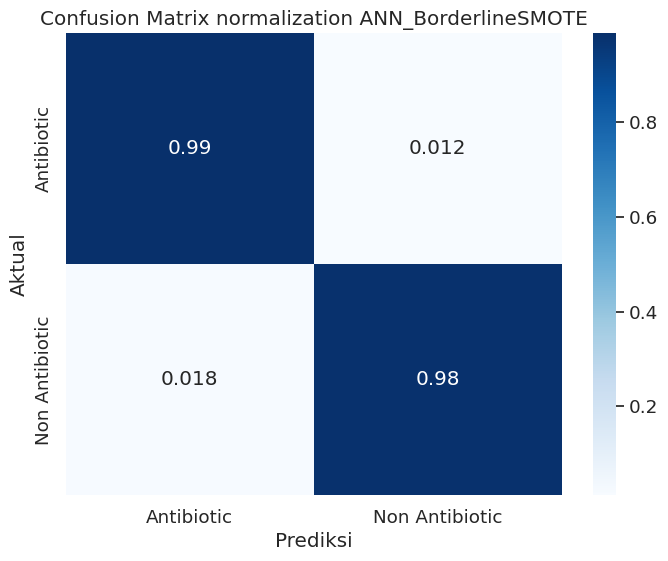

In [ ]:
cm_normalized_bs = cm_bs.astype('float') / cm_bs.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))

sns.heatmap(cm_normalized_bs, annot=True, cmap="Blues", xticklabels=["Antibiotic", "Non Antibiotic"], yticklabels=["Antibiotic", "Non Antibiotic"])

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix normalization ANN_BorderlineSMOTE')
plt.show()

In [ ]:
print("Evaluation on Validation Data:")
print(f"Accuracy: {accuracy_score(y_test_bs, y_pred_bs)}")
print("Classification Report:")
report11=classification_report(y_test_bs, y_pred_bs,output_dict=True)
for key, value in report11.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")

Evaluation on Validation Data:
Accuracy: 0.9851851851851852
Classification Report:
0
  precision: 0.98251
  recall: 0.98827
  f1-score: 0.98538
  support: 682.00000
1
  precision: 0.98795
  recall: 0.98204
  f1-score: 0.98498
  support: 668.00000
accuracy: 0.9851851851851852
macro avg
  precision: 0.98523
  recall: 0.98515
  f1-score: 0.98518
  support: 1350.00000
weighted avg
  precision: 0.98520
  recall: 0.98519
  f1-score: 0.98518
  support: 1350.00000


# **TomekSMOTE**

In [ ]:
import imblearn
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
#transform data training
X_st, y_st = smt.fit_resample(X, y)

In [ ]:
value_counts_st = y_st.value_counts()
value_counts_st

class
0    3371
1    3371
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Pertama, kita bagi data menjadi data pelatihan (80%) dan sisa (20%)
#X_train_s, X_remaining_s, y_train_s, y_remaining_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_st, y_st, test_size=0.2, random_state=42)

# Selanjutnya, bagi sisa data menjadi data validasi (50%) dan data uji (50% dari sisa)
#X_valid_s, X_test_s, y_valid_s, y_test_s = train_test_split(X_remaining_s, y_remaining_s, test_size=0.25, random_state=42)

In [ ]:
#cek y_test
nilai_y_test_st = y_test_st.value_counts()
nilai_y_test_st

class
0    698
1    651
Name: count, dtype: int64

In [ ]:
#atur learning rate
learning_rate=0.005
optimizer = Adam(learning_rate=learning_rate)

model12 = Sequential()
model12.add(Dense(100, input_dim=X_train_s.shape[1], activation='relu'))
model12.add(Dense(100, activation='relu'))

#model3.add(Dense(64, activation='relu', kernel_initializer='he_normal'))

#model3.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#model3.add(Dense(8, activation='relu', kernel_initializer='he_normal'))

model12.add(Dense(1, activation='sigmoid'))
model12.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_st = model12.fit(X_train_st, y_train_st,validation_data=(X_test_st, y_test_st), epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[early_stopping])



Epoch 1/200
43/43 [==============================] - 1s 13ms/step - loss: 0.4523 - accuracy: 0.8025 - val_loss: 0.3826 - val_accuracy: 0.8347
Epoch 2/200
43/43 [==============================] - 0s 9ms/step - loss: 0.3157 - accuracy: 0.8693 - val_loss: 0.3085 - val_accuracy: 0.8807
Epoch 3/200
43/43 [==============================] - 0s 8ms/step - loss: 0.2785 - accuracy: 0.8847 - val_loss: 0.2541 - val_accuracy: 0.8940
Epoch 4/200
43/43 [==============================] - 0s 9ms/step - loss: 0.2500 - accuracy: 0.8956 - val_loss: 0.2733 - val_accuracy: 0.8814
Epoch 5/200
43/43 [==============================] - 0s 9ms/step - loss: 0.2434 - accuracy: 0.8991 - val_loss: 0.2375 - val_accuracy: 0.8984
Epoch 6/200
43/43 [==============================] - 0s 9ms/step - loss: 0.2443 - accuracy: 0.9015 - val_loss: 0.2175 - val_accuracy: 0.8984
Epoch 7/200
43/43 [==============================] - 0s 8ms/step - loss: 0.2005 - accuracy: 0.9182 - val_loss: 0.2043 - val_accuracy: 0.9170
Epoch 8/200


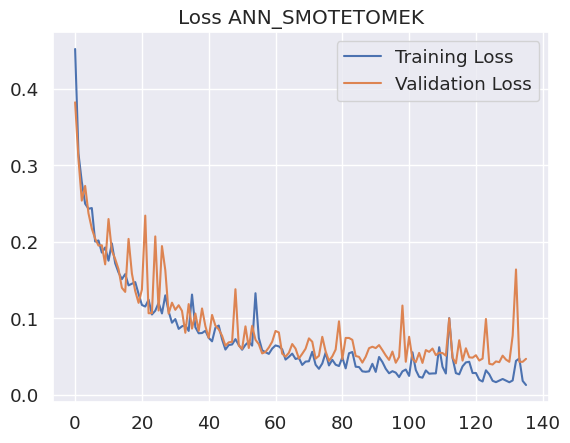

In [ ]:
#plot loss and acuracy
plt.plot(history_st.history['loss'],label='Training Loss')
plt.plot(history_st.history['val_loss'],label='Validation Loss')
plt.title('Loss ANN_SMOTETOMEK')
plt.legend()
plt.show()

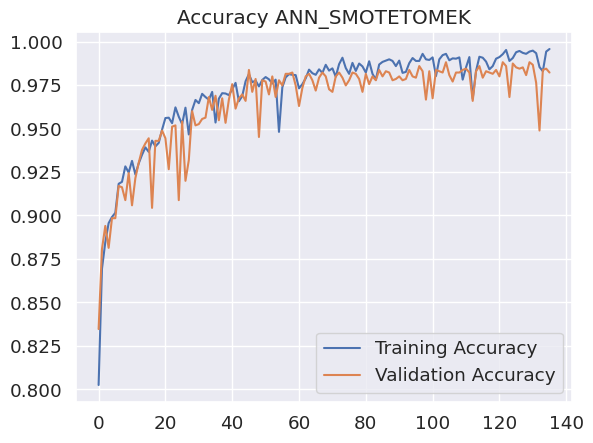

In [ ]:
#plot loss and acuracy
plt.title('Accuracy ANN_SMOTETOMEK')
plt.plot(history_st.history['accuracy'],label='Training Accuracy')
plt.plot(history_st.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, f1_score
y_pred_st=np.round(model12.predict(X_test_st))
cm_st = confusion_matrix(y_test_st,y_pred_st)
accuracy_st=accuracy_score(y_test_st,y_pred_st)
precision_st=precision_score(y_test_st,y_pred_st)
recall_st=recall_score(y_test_st,y_pred_st)
f1_st=f1_score(y_test_st,y_pred_st)
#print
print("Accuracy : ",accuracy_st)
print("Precision: ",precision_st)
print("Recall   : ",recall_st)
print("F1-Score : ",f1_st)


43/43 [==============================] - 1s 6ms/step
Accuracy :  0.9851742031134173
Precision:  0.9921996879875195
Recall   :  0.9769585253456221
F1-Score :  0.9845201238390092


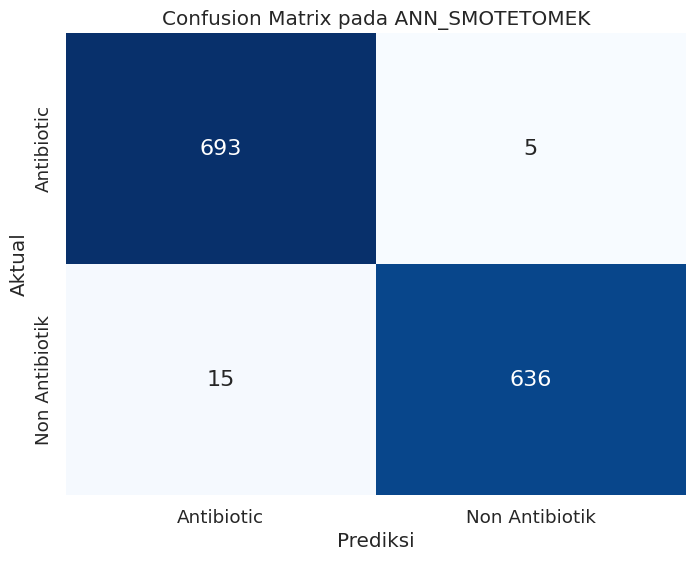

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
sns.heatmap(cm_st, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Antibiotic', 'Non Antibiotik'], yticklabels=['Antibiotic', 'Non Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix pada ANN_SMOTETOMEK')
plt.show()

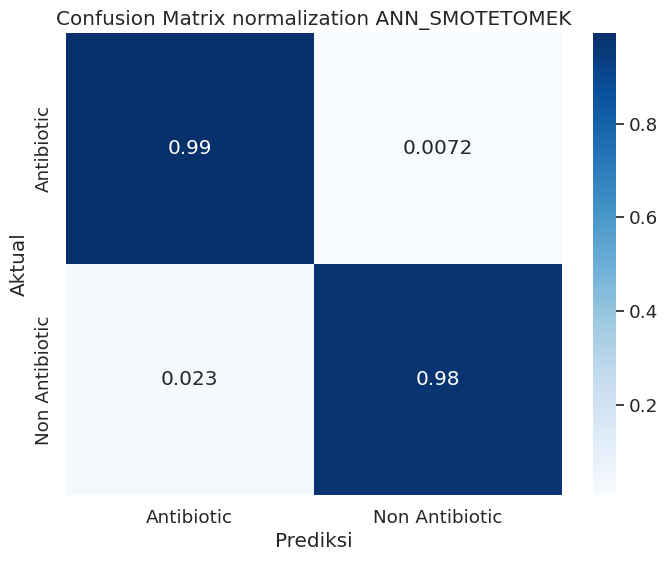

In [ ]:
cm_normalized_st = cm_st.astype('float') / cm_st.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))

sns.heatmap(cm_normalized_st, annot=True, cmap="Blues", xticklabels=["Antibiotic", "Non Antibiotic"], yticklabels=["Antibiotic", "Non Antibiotic"])

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix normalization ANN_SMOTETOMEK')
plt.show()

In [ ]:
print("Evaluation on Validation Data:")
print(f"Accuracy: {accuracy_score(y_test_st, y_pred_st)}")
print("Classification Report:")
report12=classification_report(y_test_st, y_pred_st,output_dict=True)
for key, value in report12.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")

Evaluation on Validation Data:
Accuracy: 0.9851742031134173
Classification Report:
0
  precision: 0.97881
  recall: 0.99284
  f1-score: 0.98578
  support: 698.00000
1
  precision: 0.99220
  recall: 0.97696
  f1-score: 0.98452
  support: 651.00000
accuracy: 0.9851742031134173
macro avg
  precision: 0.98551
  recall: 0.98490
  f1-score: 0.98515
  support: 1349.00000
weighted avg
  precision: 0.98527
  recall: 0.98517
  f1-score: 0.98517
  support: 1349.00000


# **SMOTEENN**

In [ ]:
import imblearn
from imblearn.combine import SMOTEENN
se = SMOTEENN(random_state=42)
#transform data training
X_se, y_se = se.fit_resample(X, y)

In [ ]:
value_counts_se = y_se.value_counts()
value_counts_se

class
0    3335
1    3084
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Pertama, kita bagi data menjadi data pelatihan (80%) dan sisa (20%)
#X_train_s, X_remaining_s, y_train_s, y_remaining_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)
X_train_se, X_test_se, y_train_se, y_test_se = train_test_split(X_se, y_se, test_size=0.2, random_state=42)

# Selanjutnya, bagi sisa data menjadi data validasi (50%) dan data uji (50% dari sisa)
#X_valid_s, X_test_s, y_valid_s, y_test_s = train_test_split(X_remaining_s, y_remaining_s, test_size=0.25, random_state=42)

In [ ]:
#cek y_test
nilai_y_test_se = y_test_se.value_counts()
nilai_y_test_se

class
0    683
1    601
Name: count, dtype: int64

In [ ]:
#atur learning rate
learning_rate=0.005
optimizer = Adam(learning_rate=learning_rate)

model13 = Sequential()
model13.add(Dense(100, input_dim=X_train_s.shape[1], activation='relu'))
model13.add(Dense(100, activation='relu'))

#model3.add(Dense(64, activation='relu', kernel_initializer='he_normal'))

#model3.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#model3.add(Dense(8, activation='relu', kernel_initializer='he_normal'))

model13.add(Dense(1, activation='sigmoid'))
model13.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_se = model13.fit(X_train_se, y_train_se,validation_data=(X_test_se, y_test_se), epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[early_stopping])



Epoch 1/200
41/41 [==============================] - 1s 14ms/step - loss: 0.4149 - accuracy: 0.8101 - val_loss: 0.3523 - val_accuracy: 0.8536
Epoch 2/200
41/41 [==============================] - 0s 8ms/step - loss: 0.3041 - accuracy: 0.8796 - val_loss: 0.3253 - val_accuracy: 0.8723
Epoch 3/200
41/41 [==============================] - 0s 8ms/step - loss: 0.2506 - accuracy: 0.9005 - val_loss: 0.2545 - val_accuracy: 0.8894
Epoch 4/200
41/41 [==============================] - 0s 9ms/step - loss: 0.2352 - accuracy: 0.9050 - val_loss: 0.2506 - val_accuracy: 0.9003
Epoch 5/200
41/41 [==============================] - 0s 9ms/step - loss: 0.2182 - accuracy: 0.9139 - val_loss: 0.2665 - val_accuracy: 0.8879
Epoch 6/200
41/41 [==============================] - 0s 9ms/step - loss: 0.2396 - accuracy: 0.9009 - val_loss: 0.2412 - val_accuracy: 0.9042
Epoch 7/200
41/41 [==============================] - 0s 9ms/step - loss: 0.2163 - accuracy: 0.9122 - val_loss: 0.2208 - val_accuracy: 0.9190
Epoch 8/200


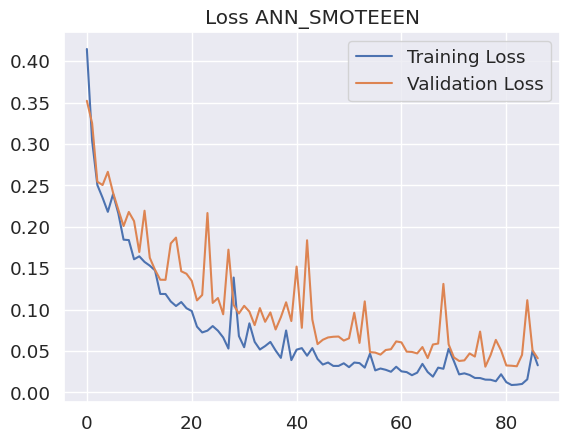

In [ ]:
#plot loss and acuracy
plt.plot(history_se.history['loss'],label='Training Loss')
plt.plot(history_se.history['val_loss'],label='Validation Loss')
plt.title('Loss ANN_SMOTEEEN')
plt.legend()
plt.show()

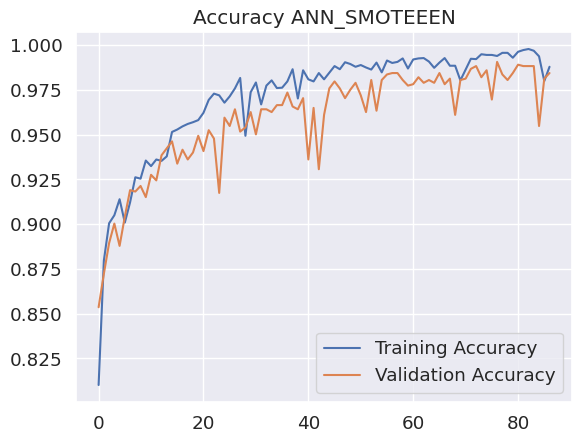

In [ ]:
#plot loss and acuracy
plt.title('Accuracy ANN_SMOTEEEN')
plt.plot(history_se.history['accuracy'],label='Training Accuracy')
plt.plot(history_se.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, f1_score
y_pred_se=np.round(model13.predict(X_test_se))
cm_se = confusion_matrix(y_test_se,y_pred_se)
accuracy_se=accuracy_score(y_test_se,y_pred_se)
precision_se=precision_score(y_test_se,y_pred_se)
recall_se=recall_score(y_test_se,y_pred_se)
f1_se=f1_score(y_test_se,y_pred_se)
#print
print("Accuracy : ",accuracy_se)
print("Precision: ",precision_se)
print("Recall   : ",recall_se)
print("F1-Score : ",f1_se)


41/41 [==============================] - 0s 3ms/step
Accuracy :  0.9906542056074766
Precision:  0.9932998324958124
Recall   :  0.9866888519134775
F1-Score :  0.989983305509182


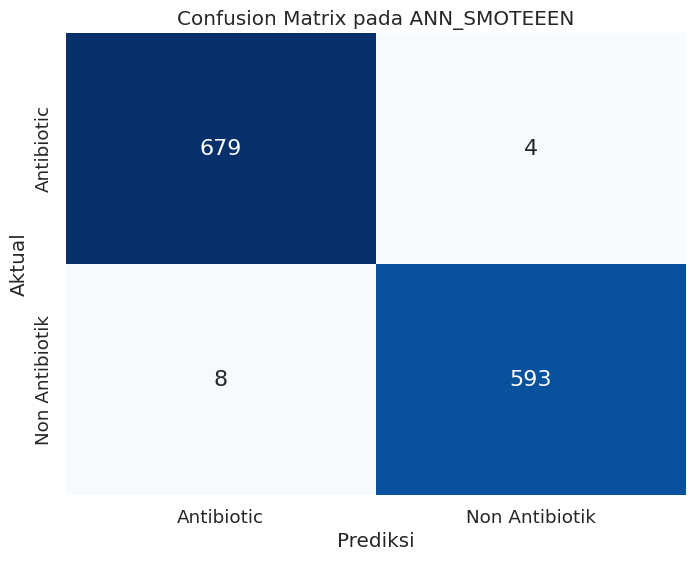

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
sns.heatmap(cm_se, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Antibiotic', 'Non Antibiotik'], yticklabels=['Antibiotic', 'Non Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix pada ANN_SMOTEEEN')
plt.show()

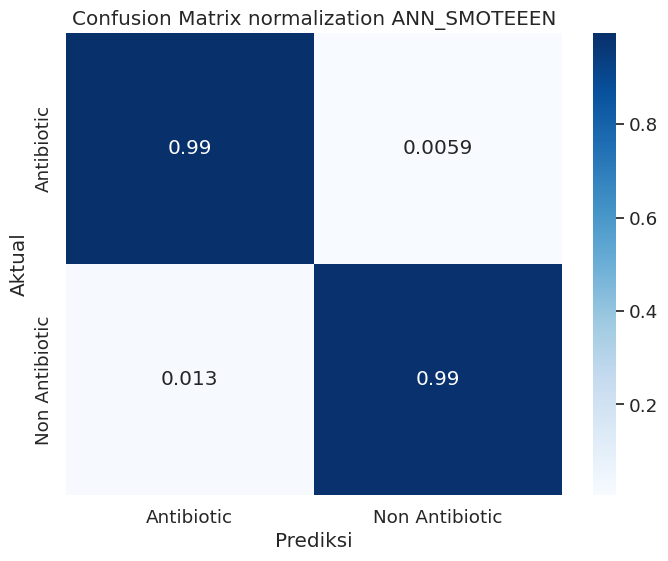

In [ ]:
cm_normalized_se = cm_se.astype('float') / cm_se.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))

sns.heatmap(cm_normalized_se, annot=True, cmap="Blues", xticklabels=["Antibiotic", "Non Antibiotic"], yticklabels=["Antibiotic", "Non Antibiotic"])

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix normalization ANN_SMOTEEEN')
plt.show()

In [ ]:
print("Evaluation on Validation Data:")
print(f"Accuracy: {accuracy_score(y_test_se, y_pred_se)}")
print("Classification Report:")
report13=classification_report(y_test_se, y_pred_se,output_dict=True)
for key, value in report13.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")

Evaluation on Validation Data:
Accuracy: 0.9906542056074766
Classification Report:
0
  precision: 0.98836
  recall: 0.99414
  f1-score: 0.99124
  support: 683.00000
1
  precision: 0.99330
  recall: 0.98669
  f1-score: 0.98998
  support: 601.00000
accuracy: 0.9906542056074766
macro avg
  precision: 0.99083
  recall: 0.99042
  f1-score: 0.99061
  support: 1284.00000
weighted avg
  precision: 0.99067
  recall: 0.99065
  f1-score: 0.99065
  support: 1284.00000


# **Hasil test prediksi**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data-data/penelitian/similarity_MNP_input_datatest.csv")

In [ ]:
data

,572,1374,1805,2008,2019,2082,2142,2271,2353,2540,...,162679316,162679317,163027008,163061838,163106457,163196262,163196278,163196389,163196955,163322401
0,0.083333,0.184211,0.157895,0.294872,0.296296,0.093023,0.265306,0.267857,0.113924,0.115702,...,0.142857,0.069307,0.277778,0.270833,0.270833,0.117021,0.220339,0.133333,0.148936,0.362069
1,0.088235,0.194444,0.135135,0.269231,0.287500,0.097561,0.224490,0.254545,0.116883,0.117647,...,0.148148,0.070707,0.267606,0.250000,0.250000,0.119565,0.228070,0.136986,0.152174,0.327586
2,0.137931,0.083333,0.085714,0.158537,0.207317,0.108108,0.166667,0.120690,0.123288,0.131579,...,0.160000,0.073684,0.178082,0.221053,0.221053,0.151163,0.245283,0.179104,0.120879,0.327273
3,0.156250,0.075000,0.050000,0.178571,0.211765,0.046512,0.153846,0.112903,0.075000,0.117647,...,0.068966,0.039216,0.139241,0.263158,0.263158,0.131868,0.186441,0.121622,0.092784,0.350877
4,0.156250,0.075000,0.050000,0.178571,0.211765,0.046512,0.153846,0.112903,0.075000,0.117647,...,0.068966,0.039216,0.139241,0.263158,0.263158,0.131868,0.186441,0.121622,0.092784,0.350877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.014925,0.013699,0.028169,0.382979,0.472527,0.187500,0.011111,0.265823,0.539474,0.518519,...,0.347826,0.611765,0.406977,0.279661,0.301724,0.522727,0.346667,0.280899,0.489130,0.125000
69,0.222222,0.120000,0.080000,0.090909,0.142857,0.111111,0.125000,0.102041,0.044118,0.113208,...,0.068182,0.022472,0.102941,0.141304,0.141304,0.047619,0.145833,0.133333,0.070588,0.169811
70,0.071429,0.105263,0.176471,0.100000,0.094595,0.150000,0.055556,0.175000,0.066667,0.037383,...,0.111111,0.050000,0.079365,0.065217,0.065217,0.051948,0.116279,0.089286,0.063291,0.122449
71,0.160000,0.129032,0.096774,0.151899,0.187500,0.088235,0.181818,0.129630,0.068493,0.116071,...,0.058824,0.020833,0.138889,0.191489,0.191489,0.067416,0.148148,0.136364,0.065217,0.301887


In [ ]:
X_data_asli = data

In [ ]:
y_prediksi_ann=np.round(model.predict(X_data_asli))
y_prediksi_ann_s=np.round(model3.predict(X_data_asli))
y_prediksi_ann_u=np.round(model2.predict(X_data_asli))
y_prediksi_ann_svms=np.round(model10.predict(X_data_asli))
y_prediksi_ann_bs=np.round(model11.predict(X_data_asli))
y_prediksi_ann_st=np.round(model12.predict(X_data_asli))
y_prediksi_ann_se=np.round(model13.predict(X_data_asli))



3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 0s 5ms/step


In [ ]:
yhasil=pd.DataFrame(y_prediksi_ann,columns=['Prediksi ANN Original'])
yhasil_s=pd.DataFrame(y_prediksi_ann_s,columns=['Prediksi ANN SMOTE'])
yhasil_under=pd.DataFrame(y_prediksi_ann_u,columns=['Prediksi ANN Undersampling'])
yhasil_svms=pd.DataFrame(y_prediksi_ann_svms,columns=['Prediksi ANN SVM SMOTE'])
yhasil_bs=pd.DataFrame(y_prediksi_ann_bs,columns=['Prediksi ANN Borderline SMOTE'])
yhasil_st=pd.DataFrame(y_prediksi_ann_st,columns=['Prediksi ANN SMOTE TOMEK'])
yhasil_se=pd.DataFrame(y_prediksi_ann_se,columns=['Prediksi ANN SMOTE EEN'])


In [ ]:
hasildatacoy=pd.concat([X_data_asli, yhasil['Prediksi ANN Original'],yhasil_s['Prediksi ANN SMOTE'],yhasil_under['Prediksi ANN Undersampling'],
                        yhasil_svms['Prediksi ANN SVM SMOTE'],yhasil_bs['Prediksi ANN Borderline SMOTE'],yhasil_st['Prediksi ANN SMOTE TOMEK'],yhasil_se['Prediksi ANN SMOTE EEN']], axis=1)

In [ ]:
hasildatacoy.to_csv('datacoy_new_lagi_ICOMATH_paling_oke.csv', index=False)

In [ ]:
hitunghasil=yhasil.value_counts()
hitunghasil_s=yhasil_s.value_counts()
hitunghasil_over=yhasil_over.value_counts()
hitunghasil_under=yhasil_under.value_counts()

In [ ]:
hitunghasil

Prediksi Original
0.0                  71
1.0                   2
Name: count, dtype: int64

In [ ]:
hitunghasil_s

Prediksi SMOTE
0.0               69
1.0                4
Name: count, dtype: int64

In [ ]:
hitunghasil_under

Prediksi Undersampling
0.0                       68
1.0                        5
Name: count, dtype: int64

In [ ]:
hitunghasil_over

Prediksi Oversampling
0.0                      71
1.0                       2
Name: count, dtype: int64

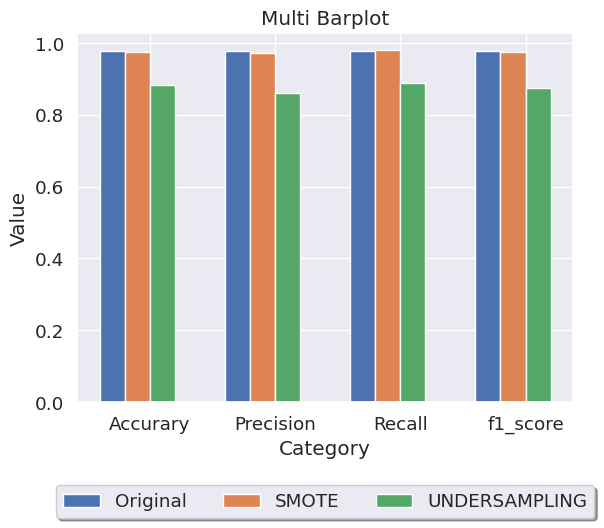

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
categories = ['Accurary', 'Precision', 'Recall', 'f1_score']
values1 = [accuracy, precision, recall, f1]
values2 = [accuracy_s, precision_s, recall_s, f1_s]
#values3 = [accuracy_over, precision_over, recall_over, f1_over]
values4 = [accuracy_under, precision_under, recall_under, f1_under]

# Menentukan lebar bar
bar_width = 0.2
index = np.arange(len(categories))

# Membuat multi bar plot
plt.bar(index, values1, bar_width, label='Original')
plt.bar(index + bar_width, values2, bar_width, label='SMOTE')
#plt.bar(index + 2*bar_width, values3, bar_width, label='OVERSAMPLING')
plt.bar(index + 2*bar_width, values4, bar_width, label='UNDERSAMPLING')

# Menambahkan judul dan label sumbu
plt.title('Multi Barplot')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(index + 1.5 * bar_width, categories)

# Menambahkan legenda
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)


# Menampilkan plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import pydotplus
from IPython.display import Image


In [ ]:
# Inisialisasi model Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf_s = DecisionTreeClassifier(random_state=42)
clf_u = DecisionTreeClassifier(random_state=42)

In [ ]:
# Melatih model dengan data pelatihan
clf.fit(X_train, y_train)
clf_s.fit(X_train_s,y_train_s)
clf_u.fit(X_train_under,y_train_under)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Prediksi menggunakan data uji
y_test_pred_dc = clf.predict(X_test)
y_test_pred_dc_s = clf_s.predict(X_test_s)
y_test_pred_dc_u = clf_u.predict(X_test_under)


In [ ]:
# Evaluasi model menggunakan data uji
print("\nEvaluation on Test Data DC:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dc)}")
print("Classification Report:")
report_dc=classification_report(y_test, y_test_pred_dc,output_dict=True)
for key, value in report_dc.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")
print('--------------------------------------')
# Evaluasi model menggunakan data uji smote
print("\nEvaluation on Test Data DC Smote:")
print(f"Accuracy: {accuracy_score(y_test_s, y_test_pred_dc_s)}")
print("Classification Report DC Smote:")
report_dc_s=classification_report(y_test_s, y_test_pred_dc_s,output_dict=True)
for key, value in report_dc_s.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")
print('--------------------------------------')
# Evaluasi model menggunakan data uji under
print("\nEvaluation on Test Data DC Under:")
print(f"Accuracy: {accuracy_score(y_test_under, y_test_pred_dc_u)}")
print("Classification Report DC Under:")
report_dc_u=classification_report(y_test_under, y_test_pred_dc_u,output_dict=True)
for key, value in report_dc_u.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")


Evaluation on Test Data DC:
Accuracy: 0.9629156010230179
Classification Report:
0
  precision: 0.97134
  recall: 0.98471
  f1-score: 0.97798
  support: 654.00000
1
  precision: 0.91597
  recall: 0.85156
  f1-score: 0.88259
  support: 128.00000
accuracy: 0.9629156010230179
macro avg
  precision: 0.94365
  recall: 0.91814
  f1-score: 0.93029
  support: 782.00000
weighted avg
  precision: 0.96228
  recall: 0.96292
  f1-score: 0.96237
  support: 782.00000
--------------------------------------

Evaluation on Test Data DC Smote:
Accuracy: 0.9703703703703703
Classification Report DC Smote:
0
  precision: 0.97289
  recall: 0.96707
  f1-score: 0.96997
  support: 668.00000
1
  precision: 0.96793
  recall: 0.97361
  f1-score: 0.97076
  support: 682.00000
accuracy: 0.9703703703703703
macro avg
  precision: 0.97041
  recall: 0.97034
  f1-score: 0.97037
  support: 1350.00000
weighted avg
  precision: 0.97039
  recall: 0.97037
  f1-score: 0.97037
  support: 1350.00000
------------------------------

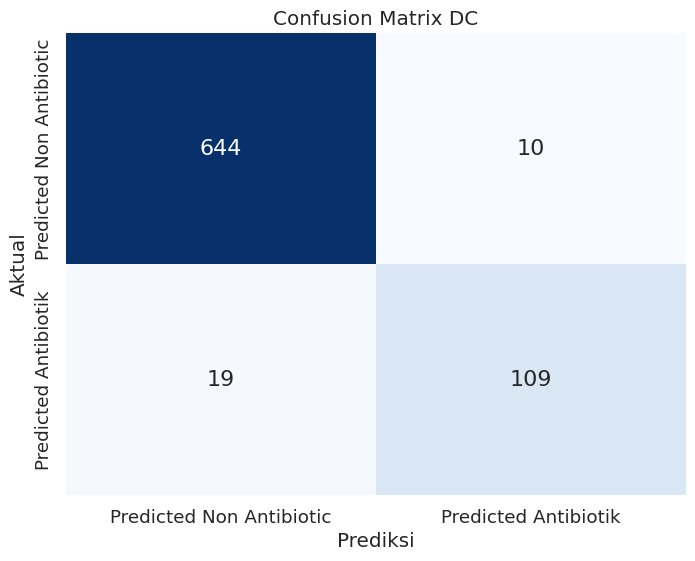

In [ ]:
#grafik confusion matrix Desicion Matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
cm_dc = confusion_matrix(y_test,y_test_pred_dc)
sns.heatmap(cm_dc, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'], yticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix DC')
plt.show()

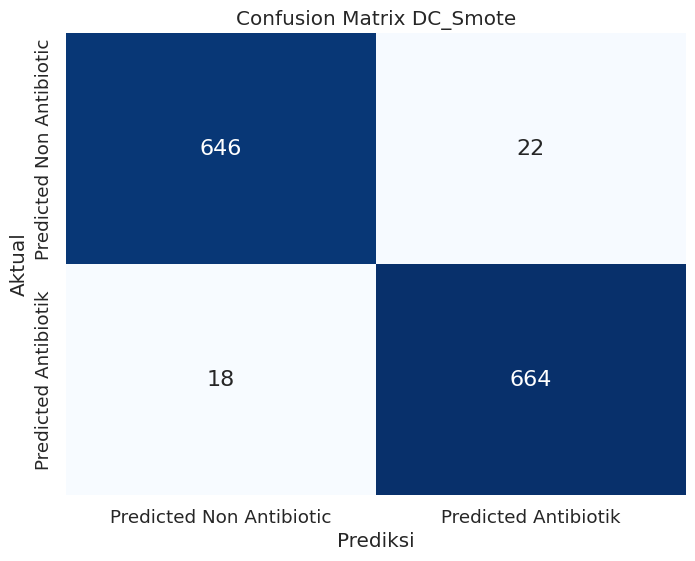

In [ ]:
#grafik confusion matrix Desicion tree smote
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
cm_dc_s = confusion_matrix(y_test_s,y_test_pred_dc_s)
sns.heatmap(cm_dc_s, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'], yticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix DC_Smote')
plt.show()

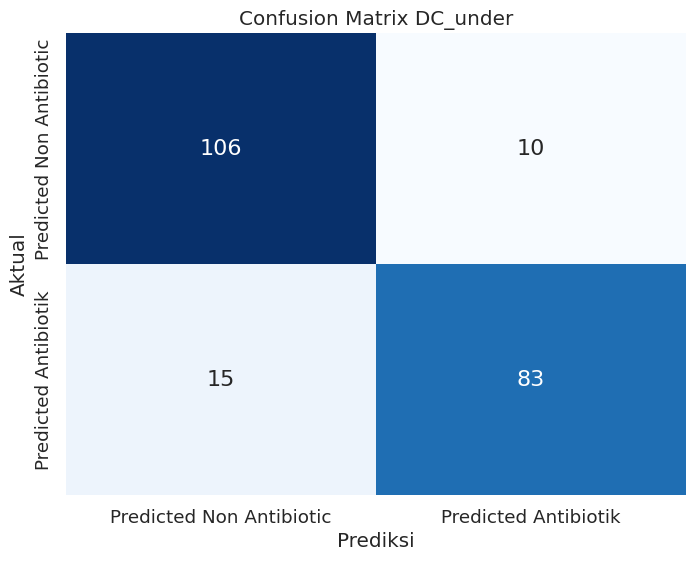

In [ ]:
#grafik confusion matrix Desicion Tree Under
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
cm_dc_u = confusion_matrix(y_test_under,y_test_pred_dc_u)
sns.heatmap(cm_dc_u, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'], yticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix DC_under')
plt.show()

In [ ]:
# Prediksi menggunakan data uji
y_hasil_dc = clf.predict(X_data)

In [ ]:
yhasildc=pd.DataFrame(y_hasil_dc,columns=['DC prediksi'])

In [ ]:
hasildata=pd.concat([X_data, yhasil['Prediksi Original'],yhasil_s['Prediksi SMOTE'],yhasil_over['Prediksi Oversampling'],yhasil_under['Prediksi Undersampling'],yhasildc['DC prediksi']], axis=1)

In [ ]:
hasildata.to_csv('datadc.csv', index=False)

In [ ]:
yhasildc.value_counts()

DC prediksi
0              70
1               3
Name: count, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Inisialisasi model Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf_s = RandomForestClassifier(random_state=42)
rf_clf_u = RandomForestClassifier(random_state=42)

# Melatih model dengan data pelatihan
rf_clf.fit(X_train, y_train)
rf_clf_s.fit(X_train_s, y_train_s)
rf_clf_u.fit(X_train_under, y_train_under)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi menggunakan data uji
y_test_pred_rf = rf_clf.predict(X_test)
y_test_pred_rf_s = rf_clf_s.predict(X_test_s)
y_test_pred_rf_u = rf_clf_u.predict(X_test_under)

In [ ]:
# Evaluasi model menggunakan data uji
print("\nEvaluation on Test Data (Random Forest):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf)}")
print("Classification Report:")
report_rf=classification_report(y_test, y_test_pred_rf,output_dict=True)
for key, value in report_rf.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")
print('--------------------------------------')
# Evaluasi model menggunakan data uji
print("\nEvaluation on Test Data (Random Forest) SMOTE:")
print(f"Accuracy: {accuracy_score(y_test_s, y_test_pred_rf_s)}")
print("Classification Report:")
report_rf_s=classification_report(y_test_s, y_test_pred_rf_s,output_dict=True)
for key, value in report_rf_s.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")
print('--------------------------------------')
# Evaluasi model menggunakan data uji
print("\nEvaluation on Test Data (Random Forest) Under:")
print(f"Accuracy: {accuracy_score(y_test_under, y_test_pred_rf_u)}")
print("Classification Report:")
report_rf_u=classification_report(y_test_under, y_test_pred_rf_u,output_dict=True)
for key, value in report_rf_u.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")


Evaluation on Test Data (Random Forest):
Accuracy: 0.9718670076726342
Classification Report:
0
  precision: 0.96884
  recall: 0.99847
  f1-score: 0.98343
  support: 654.00000
1
  precision: 0.99074
  recall: 0.83594
  f1-score: 0.90678
  support: 128.00000
accuracy: 0.9718670076726342
macro avg
  precision: 0.97979
  recall: 0.91720
  f1-score: 0.94511
  support: 782.00000
weighted avg
  precision: 0.97243
  recall: 0.97187
  f1-score: 0.97089
  support: 782.00000
--------------------------------------

Evaluation on Test Data (Random Forest) SMOTE:
Accuracy: 0.9859259259259259
Classification Report:
0
  precision: 0.98361
  recall: 0.98802
  f1-score: 0.98581
  support: 668.00000
1
  precision: 0.98822
  recall: 0.98387
  f1-score: 0.98604
  support: 682.00000
accuracy: 0.9859259259259259
macro avg
  precision: 0.98591
  recall: 0.98595
  f1-score: 0.98592
  support: 1350.00000
weighted avg
  precision: 0.98594
  recall: 0.98593
  f1-score: 0.98593
  support: 1350.00000
-------------

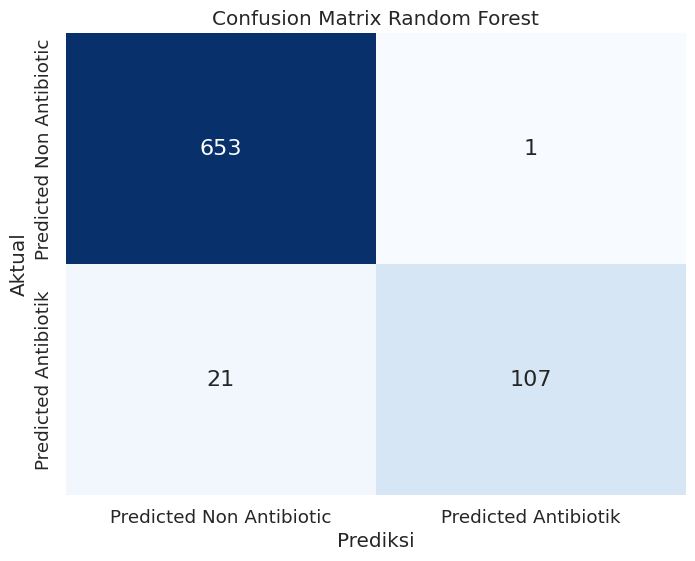

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
cm_fr = confusion_matrix(y_test,y_test_pred_rf)
sns.heatmap(cm_fr, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'], yticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest')
plt.show()

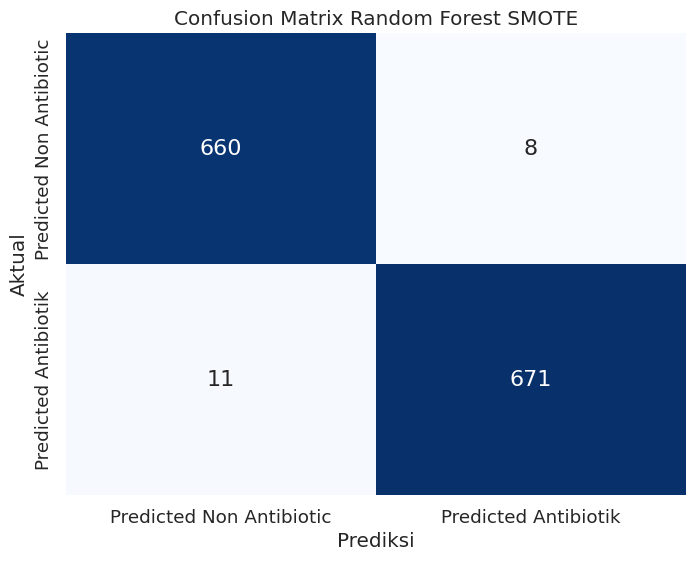

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
cm_fr_s = confusion_matrix(y_test_s,y_test_pred_rf_s)
sns.heatmap(cm_fr_s, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'], yticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest SMOTE')
plt.show()

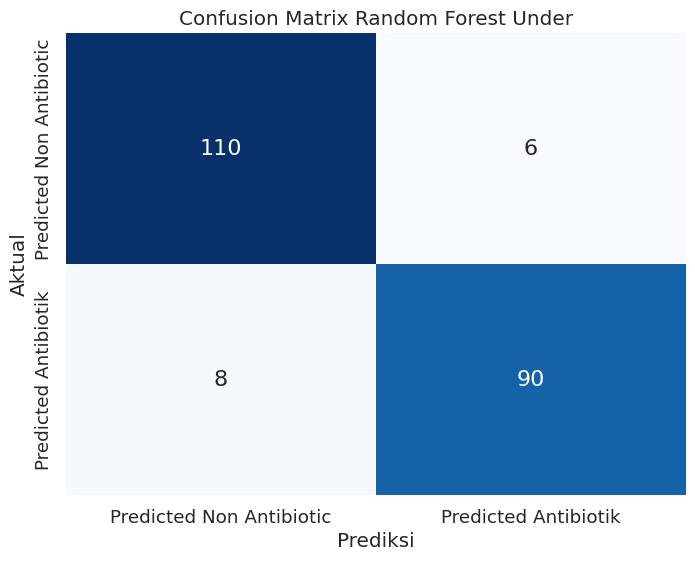

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ukuran font
cm_fr_u = confusion_matrix(y_test_under,y_test_pred_rf_u)
sns.heatmap(cm_fr_u, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, xticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'], yticklabels=['Predicted Non Antibiotic', 'Predicted Antibiotik'],cbar=False)

# Menambahkan label dan judul
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest Under')
plt.show()

In [ ]:
# Prediksi menggunakan data uji
y_hasil_rf = rf_clf.predict(X_data)

In [ ]:
yhasilrf=pd.DataFrame(y_hasil_rf,columns=['RF prediksi'])
hasildata=pd.concat([X_data, yhasil['Prediksi Original'],yhasil_s['Prediksi SMOTE'],yhasil_over['Prediksi Oversampling'],yhasil_under['Prediksi Undersampling'],yhasildc['DC prediksi'],yhasilrf['RF prediksi']], axis=1)

In [ ]:
hasildata.to_csv('datarf.csv', index=False)

In [ ]:
yhasilrf.value_counts()

RF prediksi
0              73
Name: count, dtype: int64

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [ ]:
# Sekarang latih model XGBoost setelah melakukan konversi
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb_s = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb_u = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)
model_xgb_s.fit(X_train_s, y_train_s)
model_xgb_u.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Membuat prediksi pada data uji
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb_s = model_xgb_s.predict(X_test_s)
y_pred_xgb_u = model_xgb_u.predict(X_test_under)

In [ ]:
# Evaluasi pada data uji
y_test_pred_xgb = model_xgb.predict(X_test)
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f'Accuracy on test set: {accuracy_test_xgb}')
report_xgb=classification_report(y_test, y_test_pred_xgb,output_dict=True)
for key, value in report_xgb.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")
print('------------------------------------')
# Evaluasi pada data uji
y_test_pred_xgb_s = model_xgb_s.predict(X_test_s)
accuracy_test_xgb_s = accuracy_score(y_test_s, y_test_pred_xgb_s)
print(f'Accuracy on test set: {accuracy_test_xgb_s}')
report_xgb_s=classification_report(y_test_s, y_test_pred_xgb_s,output_dict=True)
for key, value in report_xgb_s.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")
print('------------------------------------')
# Evaluasi pada data uji
y_test_pred_xgb_u = model_xgb_u.predict(X_test_under)
accuracy_test_xgb_u = accuracy_score(y_test_under, y_test_pred_xgb_u)
print(f'Accuracy on test set: {accuracy_test_xgb_u}')
report_xgb_u=classification_report(y_test_under, y_test_pred_xgb_u,output_dict=True)
for key, value in report_xgb_u.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")

Accuracy on test set: 0.9744245524296675
0
  precision: 0.97455
  recall: 0.99541
  f1-score: 0.98487
  support: 654.00000
1
  precision: 0.97368
  recall: 0.86719
  f1-score: 0.91736
  support: 128.00000
accuracy: 0.9744245524296675
macro avg
  precision: 0.97412
  recall: 0.93130
  f1-score: 0.95111
  support: 782.00000
weighted avg
  precision: 0.97441
  recall: 0.97442
  f1-score: 0.97382
  support: 782.00000
------------------------------------
Accuracy on test set: 0.9888888888888889
0
  precision: 0.99246
  recall: 0.98503
  f1-score: 0.98873
  support: 668.00000
1
  precision: 0.98544
  recall: 0.99267
  f1-score: 0.98904
  support: 682.00000
accuracy: 0.9888888888888889
macro avg
  precision: 0.98895
  recall: 0.98885
  f1-score: 0.98889
  support: 1350.00000
weighted avg
  precision: 0.98891
  recall: 0.98889
  f1-score: 0.98889
  support: 1350.00000
------------------------------------
Accuracy on test set: 0.9439252336448598
0
  precision: 0.94068
  recall: 0.95690
  f1-sco

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

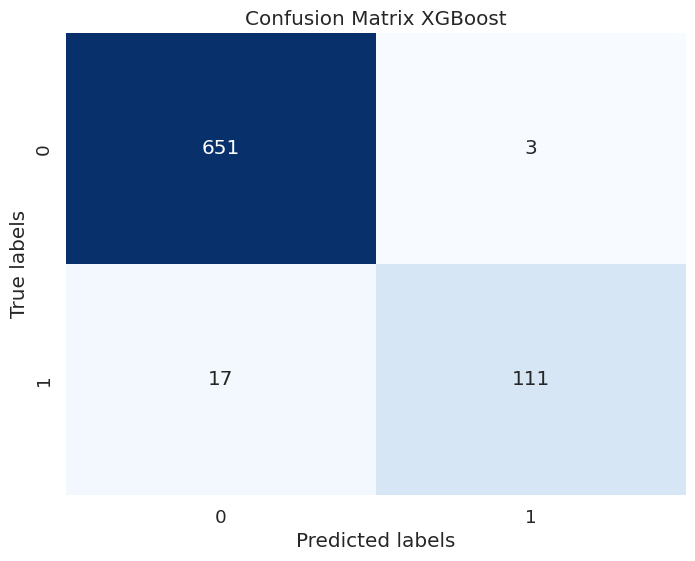

In [ ]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix XGBoost')
plt.show()

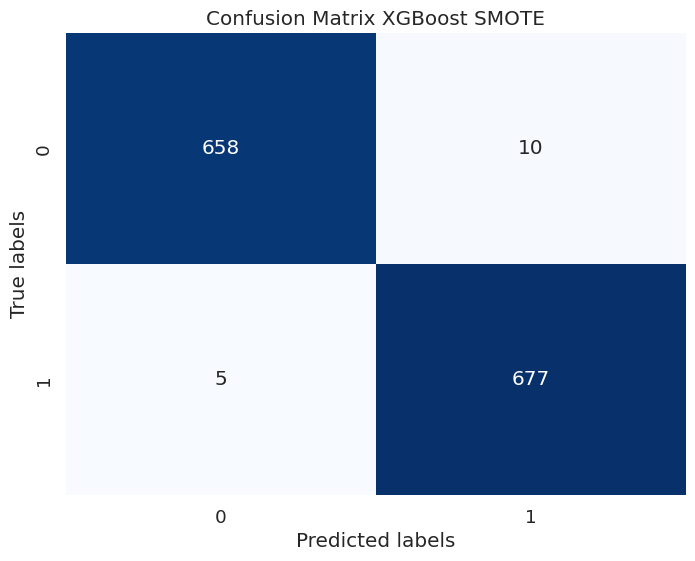

In [ ]:
# Confusion Matrix
cm_xgb_s = confusion_matrix(y_test_s, y_test_pred_xgb_s)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_s, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix XGBoost SMOTE')
plt.show()

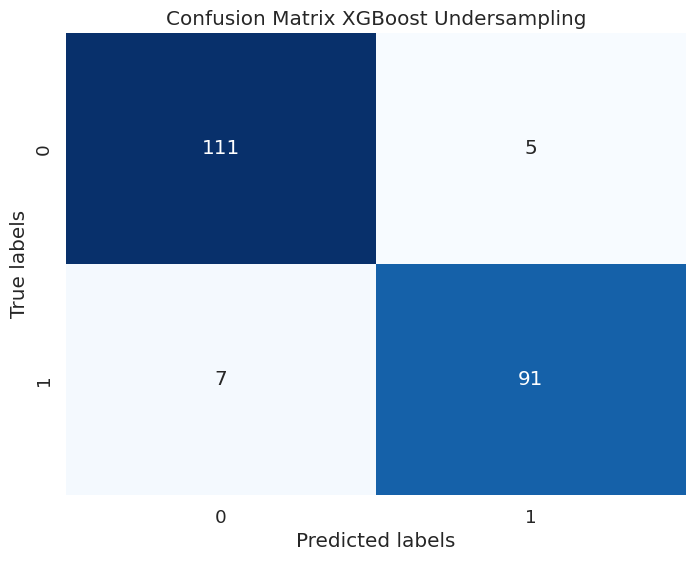

In [ ]:
# Confusion Matrix
cm_xgb_u = confusion_matrix(y_test_under, y_test_pred_xgb_u)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_u, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix XGBoost Undersampling')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Membuat model SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model_s = SVC(kernel='linear', random_state=42)
svm_model_u = SVC(kernel='linear', random_state=42)

In [ ]:
# Pelatihan model menggunakan data pelatihan
svm_model.fit(X_train, y_train)
svm_model_s.fit(X_train_s, y_train_s)
svm_model_u.fit(X_train_under, y_train_under)


SVC(kernel='linear', random_state=42)

In [ ]:
# Evaluasi model menggunakan data uji
y_pred_test_svm = svm_model.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print(f'Akurasi pada data uji: {accuracy_test_svm:}')
report_svm=classification_report(y_test, y_pred_test_svm,output_dict=True)
for key, value in report_svm.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")
print('---------------------------------')
# Evaluasi model menggunakan data uji
y_pred_test_svm_s = svm_model_s.predict(X_test_s)
accuracy_test_svm_s = accuracy_score(y_test_s, y_pred_test_svm_s)
print(f'Akurasi pada data uji: {accuracy_test_svm_s:}')
report_svm_s=classification_report(y_test_s, y_pred_test_svm_s,output_dict=True)
for key, value in report_svm_s.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")
print('---------------------------------')
# Evaluasi model menggunakan data uji
y_pred_test_svm_u = svm_model_u.predict(X_test_under)
accuracy_test_svm_u = accuracy_score(y_test_under, y_pred_test_svm_u)
print(f'Akurasi pada data uji: {accuracy_test_svm_u:}')
report_svm_u=classification_report(y_test_under, y_pred_test_svm_u,output_dict=True)
for key, value in report_svm_u.items():
    if isinstance(value, dict):
        print(key)
        for k, v in value.items():
            print(f"  {k}: {v:.5f}")  # Atur jumlah desimal di sini
    else:
        print(f"{key}: {value}")


Akurasi pada data uji: 0.9718670076726342
0
  precision: 0.96884
  recall: 0.99847
  f1-score: 0.98343
  support: 654.00000
1
  precision: 0.99074
  recall: 0.83594
  f1-score: 0.90678
  support: 128.00000
accuracy: 0.9718670076726342
macro avg
  precision: 0.97979
  recall: 0.91720
  f1-score: 0.94511
  support: 782.00000
weighted avg
  precision: 0.97243
  recall: 0.97187
  f1-score: 0.97089
  support: 782.00000
---------------------------------
Akurasi pada data uji: 0.9622222222222222
0
  precision: 0.95569
  recall: 0.96856
  f1-score: 0.96208
  support: 668.00000
1
  precision: 0.96880
  recall: 0.95601
  f1-score: 0.96236
  support: 682.00000
accuracy: 0.9622222222222222
macro avg
  precision: 0.96224
  recall: 0.96229
  f1-score: 0.96222
  support: 1350.00000
weighted avg
  precision: 0.96231
  recall: 0.96222
  f1-score: 0.96222
  support: 1350.00000
---------------------------------
Akurasi pada data uji: 0.9018691588785047
0
  precision: 0.93578
  recall: 0.87931
  f1-score:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

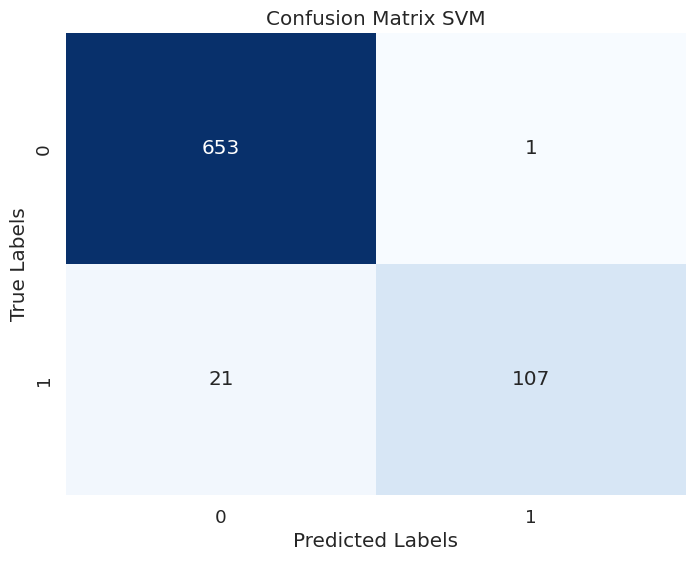

In [ ]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_test_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix SVM')
plt.show()

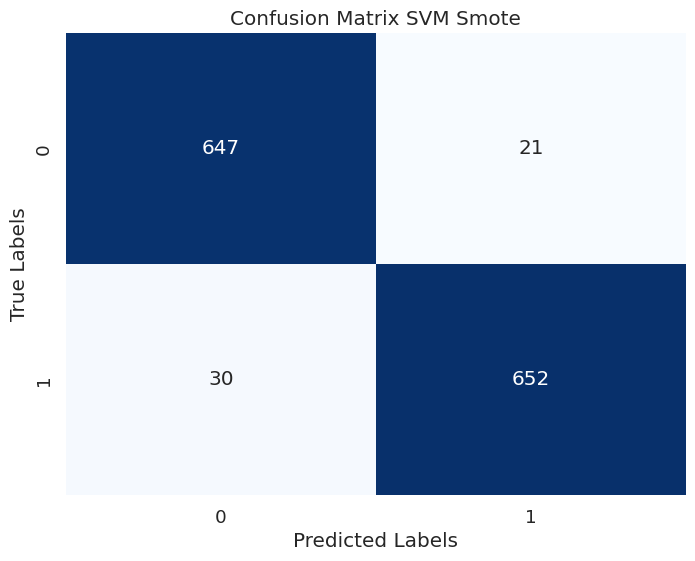

In [ ]:
# Confusion Matrix
cm_svm_s = confusion_matrix(y_test_s, y_pred_test_svm_s)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_s, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix SVM Smote')
plt.show()

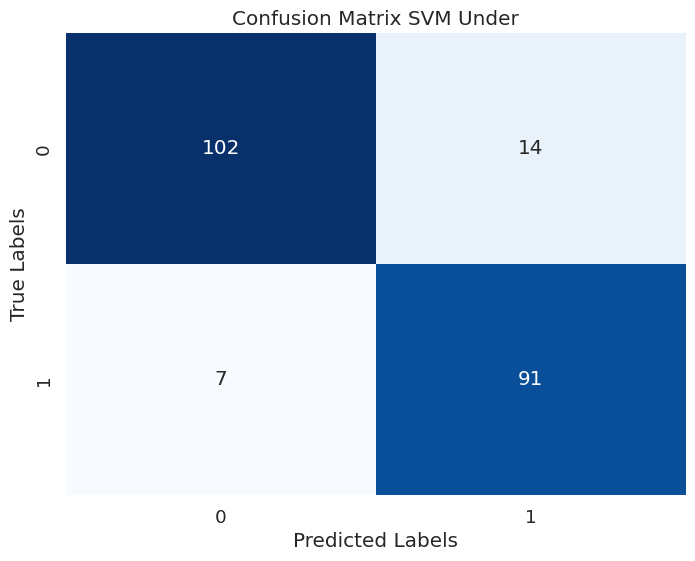

In [ ]:
# Confusion Matrix
cm_svm_u = confusion_matrix(y_test_under, y_pred_test_svm_u)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_u, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix SVM Under')
plt.show()